# Lead Scoring Case Study

## Problem Statement-
The company 'X Education' is facing a problem of low conversion of leads to customers, the rate of conversion being around 30%.
To counter this situation, the company wishes to identify the leads most likely to be converted, so that the sales team can focus their attention on them and get as many conversions out of that pool as possible.

## Initial import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#importing dataset
leads = pd.read_csv("C://Users//Ambarish Deb//Desktop//ALL//Lead Scoring Assignment//Leads.csv")
leads.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [3]:
leads.shape

(9240, 37)

## Data Cleaning

In [4]:
#checking column info
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#checking number of null values in each column
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Since there are ~9000 data points, we'll keep the missing value threshold 3000. Any columns having more than 3000 missing values shall be dropped.

In [6]:
#removing columns with>3000 null values
for x in leads.columns:
    if leads[x].isnull().sum() > 3000:
        leads=leads.drop(x, 1)
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
#checking for mode value
leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Social Media            2
Press_Release           2
youtubechannel          1
blog                    1
testone                 1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
welearnblog_Home        1
Name: Lead Source, dtype: int64

#### Data Quality Issue-
There are redundant entries in the column. Eg. (Google,google), (Social Media, Facebook , youtubechannel), (blog, welearnblog_Home)

In [8]:
#replacing redundant values
leads['Lead Source'].replace('google','Google',inplace = True)
leads['Lead Source'].replace('youtubechannel','Social Media',inplace = True)
leads['Lead Source'].replace('Facebook','Social Media',inplace = True)
leads['Lead Source'].replace('welearnblog_Home','blog',inplace = True)
leads['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
blog                    2
Live Chat               2
Press_Release           2
testone                 1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In case of categorical vars, we'll impute the mode of the columns into the empty cells.

In [9]:
#imputing mode value
leads['Lead Source']=leads['Lead Source'].fillna('Google')
leads['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
blog                    2
Live Chat               2
Press_Release           2
testone                 1
NC_EDM                  1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

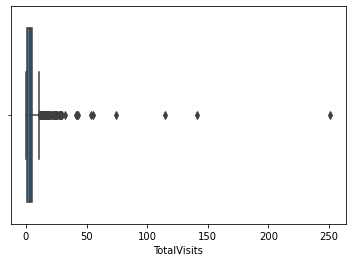

In [10]:
#checking for outliers
sns.boxplot(leads['TotalVisits'])
plt.show()

Since there are outliers, we'll impute missing values by median.

In [11]:
#imputing missing values by median
leads['TotalVisits'].fillna(leads['TotalVisits'].median(), inplace=True)
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

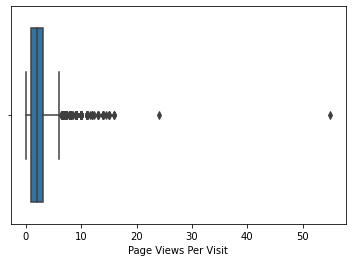

In [12]:
#checking for outliers
sns.boxplot(leads['Page Views Per Visit'])
plt.show()

In [13]:
#imputing by median
leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(), inplace=True)
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
#checking for mode value
leads['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [15]:
#imputing mode value
leads['Last Activity']=leads['Last Activity'].fillna("Email Opened")
leads['Last Activity'].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [16]:
#checking for mode value
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Italy                      2
Uganda                     2
Belgium                    2
Ghana                      2
China                      2
Asia/Pacific Region        2
Bangladesh                 2
Philippines                2
Netherlands                2
Switzerland                1
Sri Lanka                  1
Russia                     1
Tanzania                   1
Liberia                    1
Vietnam                    1
Malaysia      

In [17]:
#imputing mode value
leads['Country']=leads['Country'].fillna("India")
#Austrlia lies in asia pacific region so we'll merge them into one category.
leads['Country'].replace("Australia","Asia/Pacific Region", inplace=True)
leads['Country'].value_counts()

India                   8953
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Asia/Pacific Region       15
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Nigeria                    4
South Africa               4
Kuwait                     4
Germany                    4
Canada                     4
Sweden                     3
Netherlands                2
Philippines                2
Belgium                    2
Italy                      2
Ghana                      2
Uganda                     2
China                      2
Bangladesh                 2
Tanzania                   1
Russia                     1
Indonesia                  1
Liberia                    1
Vietnam                    1
Sri Lanka                  1
Denmark                    1
Malaysia      

In [18]:
#finding next column having null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [19]:
#checking for mode value
leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

"Select" is generall the default option which shows up on the form. Hence we have to treat it like an unknown value.

In [20]:
leads.Specialization.replace("Select","Unknown",inplace=True)
leads.Specialization.value_counts()

Unknown                              1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [21]:
#imputing mode value
leads.Specialization=leads.Specialization.fillna("Unknown")
leads.Specialization.value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
#checking for mode value
leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [23]:
#replaceing 'select' with 'unknown' and imputing mode value
leads['How did you hear about X Education'].replace("Select","Unknown", inplace=True)
leads['How did you hear about X Education']=leads['How did you hear about X Education'].fillna("Unknown")
leads['How did you hear about X Education'].value_counts()

Unknown                  7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [24]:
#finding next column with null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [25]:
#checking for mode value
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [26]:
#imputing mode value
leads['What is your current occupation']=leads['What is your current occupation'].fillna('Unemployed')
leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [27]:
#Finding next column with null values
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [28]:
#checking for mode value
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [29]:
#imputing mode value
leads['What matters most to you in choosing a course']=leads['What matters most to you in choosing a course'].fillna("Better Career Prospects")
leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                         0
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                         0
Total Time Spent on Website                         0
Page Views Per Visit                                0
Last Activity                                       0
Country                                             0
Specialization                                      0
How did you hear about X Education                  0
What is your current occupation                     0
What matters most to you in choosing a course       0
Search                                              0
Magazine                                            0
Newspaper Article           

In [30]:
#checking for mode value
leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [31]:
#replacing default value with 'unknown' and imputing mode value
leads['Lead Profile']=leads['Lead Profile'].replace("Select","Unknown")
leads['Lead Profile']=leads['Lead Profile'].fillna("Unknown")
leads['Lead Profile'].value_counts()

Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [32]:
leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [33]:
leads['City']=leads['City'].replace("Select","Unknown")
leads['City']=leads['City'].fillna("Unknown")

Interestingly, despite having multiple countries, we can see only Indian cities and there is no mention of any international city, or even the word international.

In [34]:
leads[leads['Country']!='India']['City']

14           Unknown
87            Mumbai
103           Mumbai
207          Unknown
243           Mumbai
            ...     
9139          Mumbai
9173         Unknown
9225          Mumbai
9235          Mumbai
9239    Other Cities
Name: City, Length: 287, dtype: object

It makes no sense for mumbai to be a city in an international country. Hence we'll replace it.

In [35]:
leads.loc[leads['Country']!='India','City']="Other International Cities"
leads[leads['Country']!='India']['City']

14      Other International Cities
87      Other International Cities
103     Other International Cities
207     Other International Cities
243     Other International Cities
                   ...            
9139    Other International Cities
9173    Other International Cities
9225    Other International Cities
9235    Other International Cities
9239    Other International Cities
Name: City, Length: 287, dtype: object

While imputing missing data above, we saw quite a lot of categorical columns having highly skewed data i.e. a certain value occupied a disproportionate amount of space in a column compared to others. 

In [36]:
#checking to see the percent of space occupied by the first response compared to others
categorical_columns = leads.select_dtypes(include=['object']).columns
for x in leads[categorical_columns]:
    print(x,": ",round(int(list(leads[x].value_counts())[0])/int(sum(leads[x].value_counts()))*100,2),"%")

Prospect ID :  0.01 %
Lead Origin :  52.88 %
Lead Source :  31.48 %
Do Not Email :  92.06 %
Do Not Call :  99.98 %
Last Activity :  38.31 %
Country :  96.89 %
Specialization :  36.58 %
How did you hear about X Education :  78.46 %
What is your current occupation :  89.72 %
What matters most to you in choosing a course :  99.97 %
Search :  99.85 %
Magazine :  100.0 %
Newspaper Article :  99.98 %
X Education Forums :  99.99 %
Newspaper :  99.99 %
Digital Advertisement :  99.96 %
Through Recommendations :  99.92 %
Receive More Updates About Our Courses :  100.0 %
Update me on Supply Chain Content :  100.0 %
Get updates on DM Content :  100.0 %
Lead Profile :  74.19 %
City :  39.06 %
I agree to pay the amount through cheque :  100.0 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


They can be safely removed as they won't contribute much.
Choosing 80% as threshold(if any value appears more than 80% of the time in a column, it shall be dropped)

In [37]:
for x in leads[categorical_columns]:
    if (int(list(leads[x].value_counts())[0])/int(sum(leads[x].value_counts())))*100>80:
        del leads[x]

In [38]:
#verifying
for x in leads.columns:
    print(x,": ",round(int(list(leads[x].value_counts())[0])/int(sum(leads[x].value_counts()))*100,2),"%")

Prospect ID :  0.01 %
Lead Number :  0.01 %
Lead Origin :  52.88 %
Lead Source :  31.48 %
Converted :  61.46 %
TotalVisits :  23.69 %
Total Time Spent on Website :  23.73 %
Page Views Per Visit :  23.69 %
Last Activity :  38.31 %
Specialization :  36.58 %
How did you hear about X Education :  78.46 %
Lead Profile :  74.19 %
City :  39.06 %
A free copy of Mastering The Interview :  68.74 %
Last Notable Activity :  36.87 %


In [39]:
#rechecking column information
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9240 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9240 non-null   float64
 8   Last Activity                           9240 non-null   object 
 9   Specialization                          9240 non-null   object 
 10  How did you hear about X Education      9240 non-null   obje

## EDA, Visualizations

In [40]:
import random
from scipy.stats import norm, skew

In [41]:
#defining function for selecting a random color for plots
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb

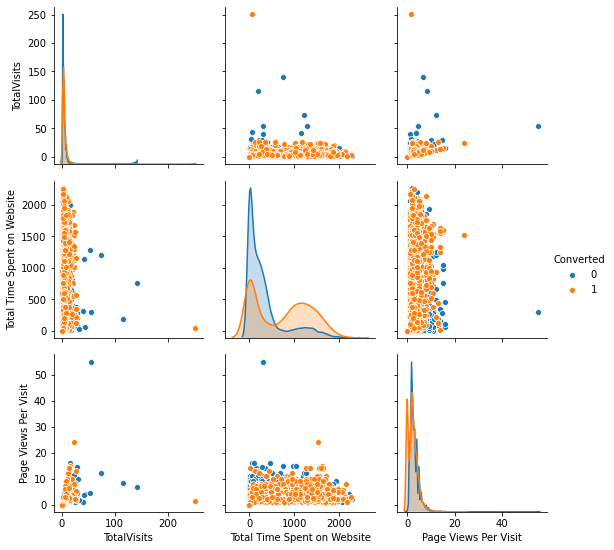

In [42]:
lead2 = leads.drop('Lead Number',axis=1,inplace=False)
sns.pairplot(lead2,diag_kind='kde',hue='Converted')
plt.show()

#### Observations:
1. Converted leads tend to visit less often but spend more time per visit (middle left)
2. Converted leads tend to visit less often but generally view more pages per visit (bottom left)

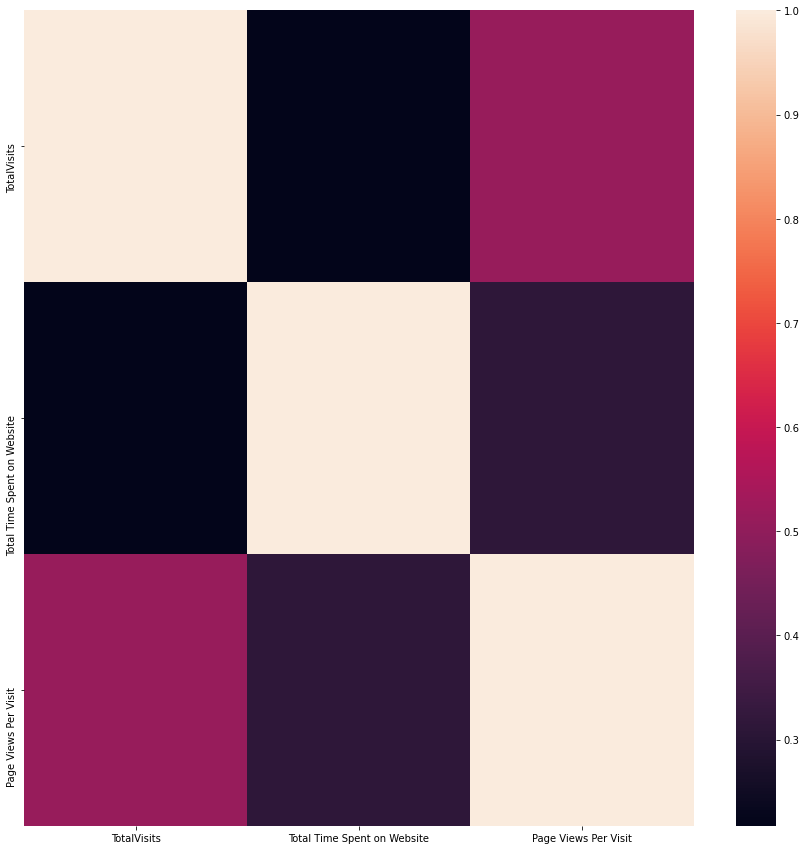

In [43]:
plt.figure(figsize = (15,15))
sns.heatmap(leads[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']].corr())
plt.show()

#### Observation- 
There doesn't seem to be much correlation between the numerical variables.

### Univariate analysis of numerical variables

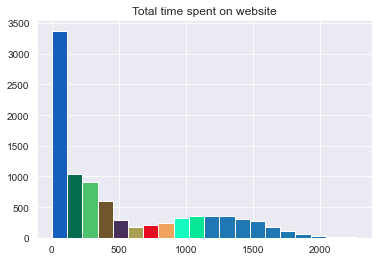

In [44]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leads['Total Time Spent on Website'],bins=20)
for i in range(10):
    patches[i].set_facecolor(randomcolor())
plt.title("Total time spent on website")
plt.show()

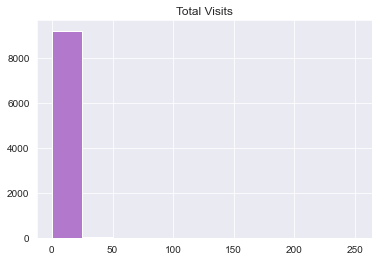

In [45]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leads['TotalVisits'],bins=10)
for i in range(3):
    patches[i].set_facecolor(randomcolor())
plt.title("Total Visits")
plt.show()

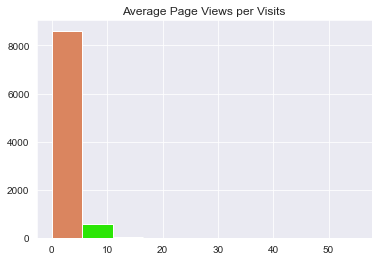

In [46]:
sns.set_style("darkgrid")
fig, ax = plt.subplots()
N,bins,patches = ax.hist(leads['Page Views Per Visit'],bins=10)
for i in range(3):
    patches[i].set_facecolor(randomcolor())
plt.title("Average Page Views per Visits")
plt.show()

The numerical data seems to be highly skewed. Let's look a little deeper.

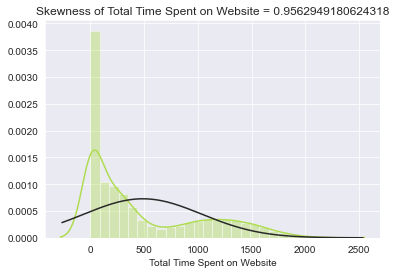

In [47]:
#checking skewness of numerical data
skewness = str(skew(leads['Total Time Spent on Website']))
sns.distplot(leads['Total Time Spent on Website'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Total Time Spent on Website'+ ' = '+ skewness)
plt.show()

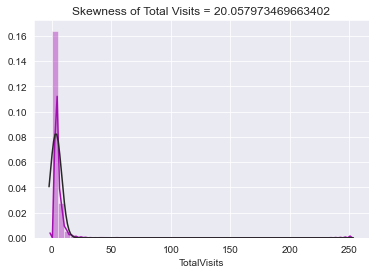

In [48]:
skewness = str(skew(leads['TotalVisits']))
sns.distplot(leads['TotalVisits'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Total Visits'+ ' = '+ skewness)
plt.show()

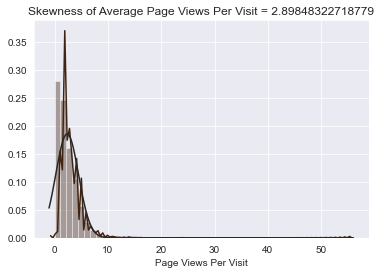

In [49]:
skewness = str(skew(leads['Page Views Per Visit']))
sns.distplot(leads['Page Views Per Visit'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Average Page Views Per Visit'+ ' = '+ skewness)
plt.show()

As we can see, the numerical variables are highly skewed. Correcting skewness using square root transformation.

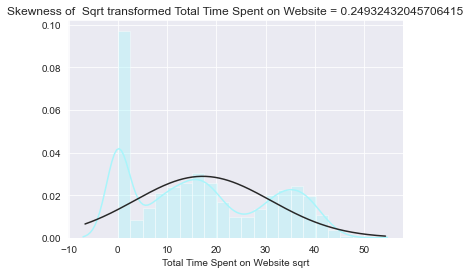

In [50]:
#using np.sqrt for square root transformation.
leads['Total Time Spent on Website sqrt'] = np.sqrt(leads['Total Time Spent on Website'])
skewness = str(skew(leads['Total Time Spent on Website sqrt']))
sns.distplot(leads['Total Time Spent on Website sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + ' Sqrt transformed Total Time Spent on Website'+ ' = '+ skewness)
plt.show()

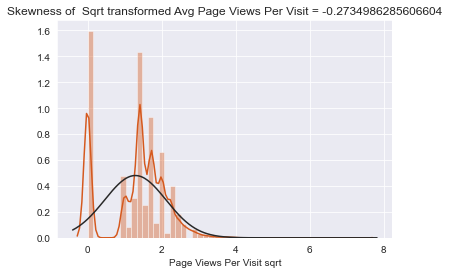

In [51]:
leads['Page Views Per Visit sqrt'] = np.sqrt(leads['Page Views Per Visit'])
skewness = str(skew(leads['Page Views Per Visit sqrt']))
sns.distplot(leads['Page Views Per Visit sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + ' Sqrt transformed Avg Page Views Per Visit'+ ' = '+ skewness)
plt.show()

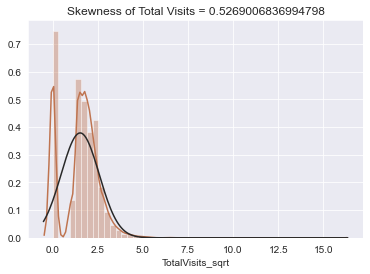

In [52]:
leads['TotalVisits_sqrt'] = np.sqrt(leads['TotalVisits'])
skewness = str(skew(leads['TotalVisits_sqrt']))
sns.distplot(leads['TotalVisits_sqrt'],fit = norm,color = randomcolor())
plt.title("Skewness of " + 'Total Visits'+ ' = '+ skewness)
plt.show()

As you can see, skewness in the numerical columns has significantly decreased.

In [53]:
#removing the original numerical variables, since we have their transformed versions.
del leads['Page Views Per Visit']
del leads['Total Time Spent on Website']
del leads['TotalVisits']

### Categorical variable analysis

In [54]:
#selecting categorical columns from the dataset.
leads.select_dtypes(include=['object'])

Prospect ID              Lead Origin  \
0     7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1     2a272436-5132-4136-86fa-dcc88c88f482                      API   
2     8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3     0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4     3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   
...                                    ...                      ...   
9235  19d6451e-fcd6-407c-b83b-48e1af805ea9  Landing Page Submission   
9236  82a7005b-7196-4d56-95ce-a79f937a158d  Landing Page Submission   
9237  aac550fe-a586-452d-8d3c-f1b62c94e02c  Landing Page Submission   
9238  5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9  Landing Page Submission   
9239  571b5c8e-a5b2-4d57-8574-f2ffb06fdeff  Landing Page Submission   

         Lead Source            Last Activity             Specialization  \
0         Olark Chat  Page Visited on Website                    Unknown   
1     Organic Search             Email Opened                    Unknown   
2     Direct Traffic             Email Opened    Business Administration   
3     Direct Traffic              Unreachable      Media and Advertising   
4             Google        Converted to Lead                    Unknown   
...              ...                      ...                        ...   
9235  Direct Traffic        Email Marked Spam     IT Projects Management   
9236  Direct Traffic                 SMS Sent      Media and Advertising   
9237  Direct Traffic                 SMS Sent    Business Administration   
9238          Google                 SMS Sent  Human Resource Management   
9239  Direct Traffic                 SMS Sent    Supply Chain Management   

     How did you hear about X Education    Lead Profile  \
0                               Unknown         Unknown   
1                               Unknown         Unknown   
2                               Unknown  Potential Lead   
3                         Word Of Mouth         Unknown   
4                                 Other         Unknown   
...                                 ...             ...   
9235                            Unknown  Potential Lead   
9236                            Unknown  Potential Lead   
9237                            Unknown  Potential Lead   
9238                      Online Search         Unknown   
9239                            Unknown  Potential Lead   

                            City A free copy of Mastering The Interview  \
0                        Unknown                                     No   
1                        Unknown                                     No   
2                         Mumbai                                    Yes   
3                         Mumbai                                     No   
4                         Mumbai                                     No   
...                          ...                                    ...   
9235  Other International Cities                                     No   
9236                      Mumbai                                    Yes   
9237                      Mumbai                                    Yes   
9238          Other Metro Cities                                     No   
9239  Other International Cities                                    Yes   

     Last Notable Activity  
0                 Modified  
1             Email Opened  
2             Email Opened  
3                 Modified  
4                 Modified  
...                    ...  
9235     Email Marked Spam  
9236              SMS Sent  
9237              SMS Sent  
9238              SMS Sent  
9239              Modified  

[9240 rows x 10 columns]

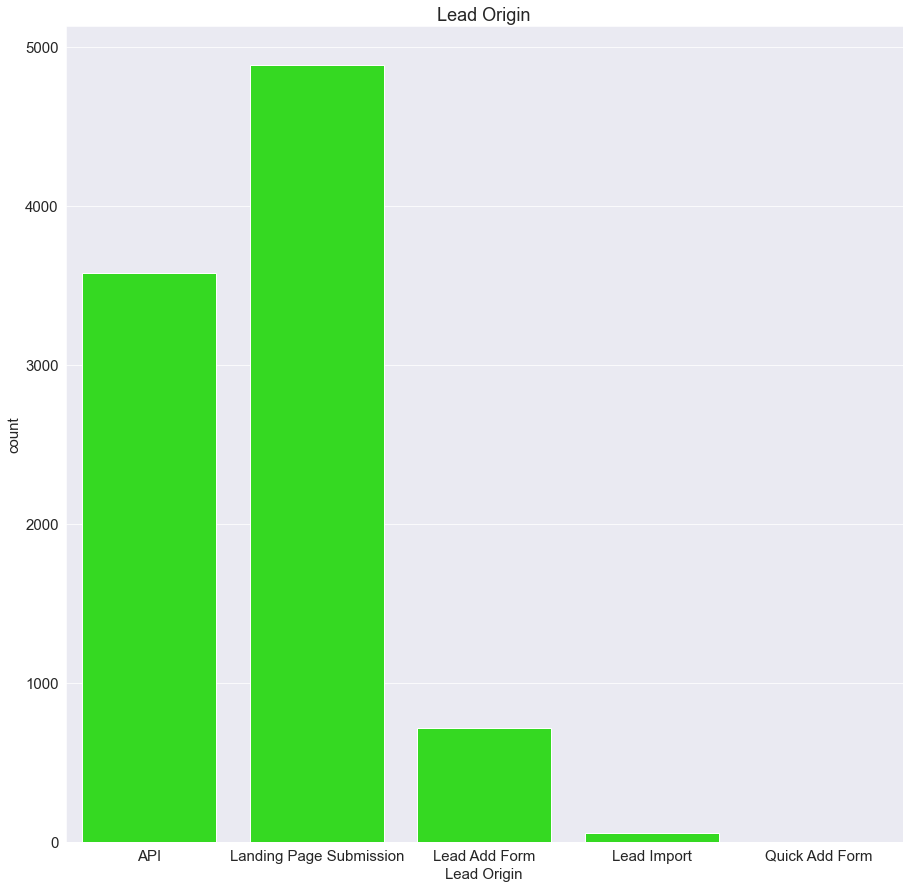

In [55]:
#bar chart counting number of leads by origin.
plt.figure(figsize=(15,15))
plt.rcParams.update({'font.size': 15})
sns.countplot(leads['Lead Origin'],color = randomcolor()).set_title('Lead Origin')
plt.show()

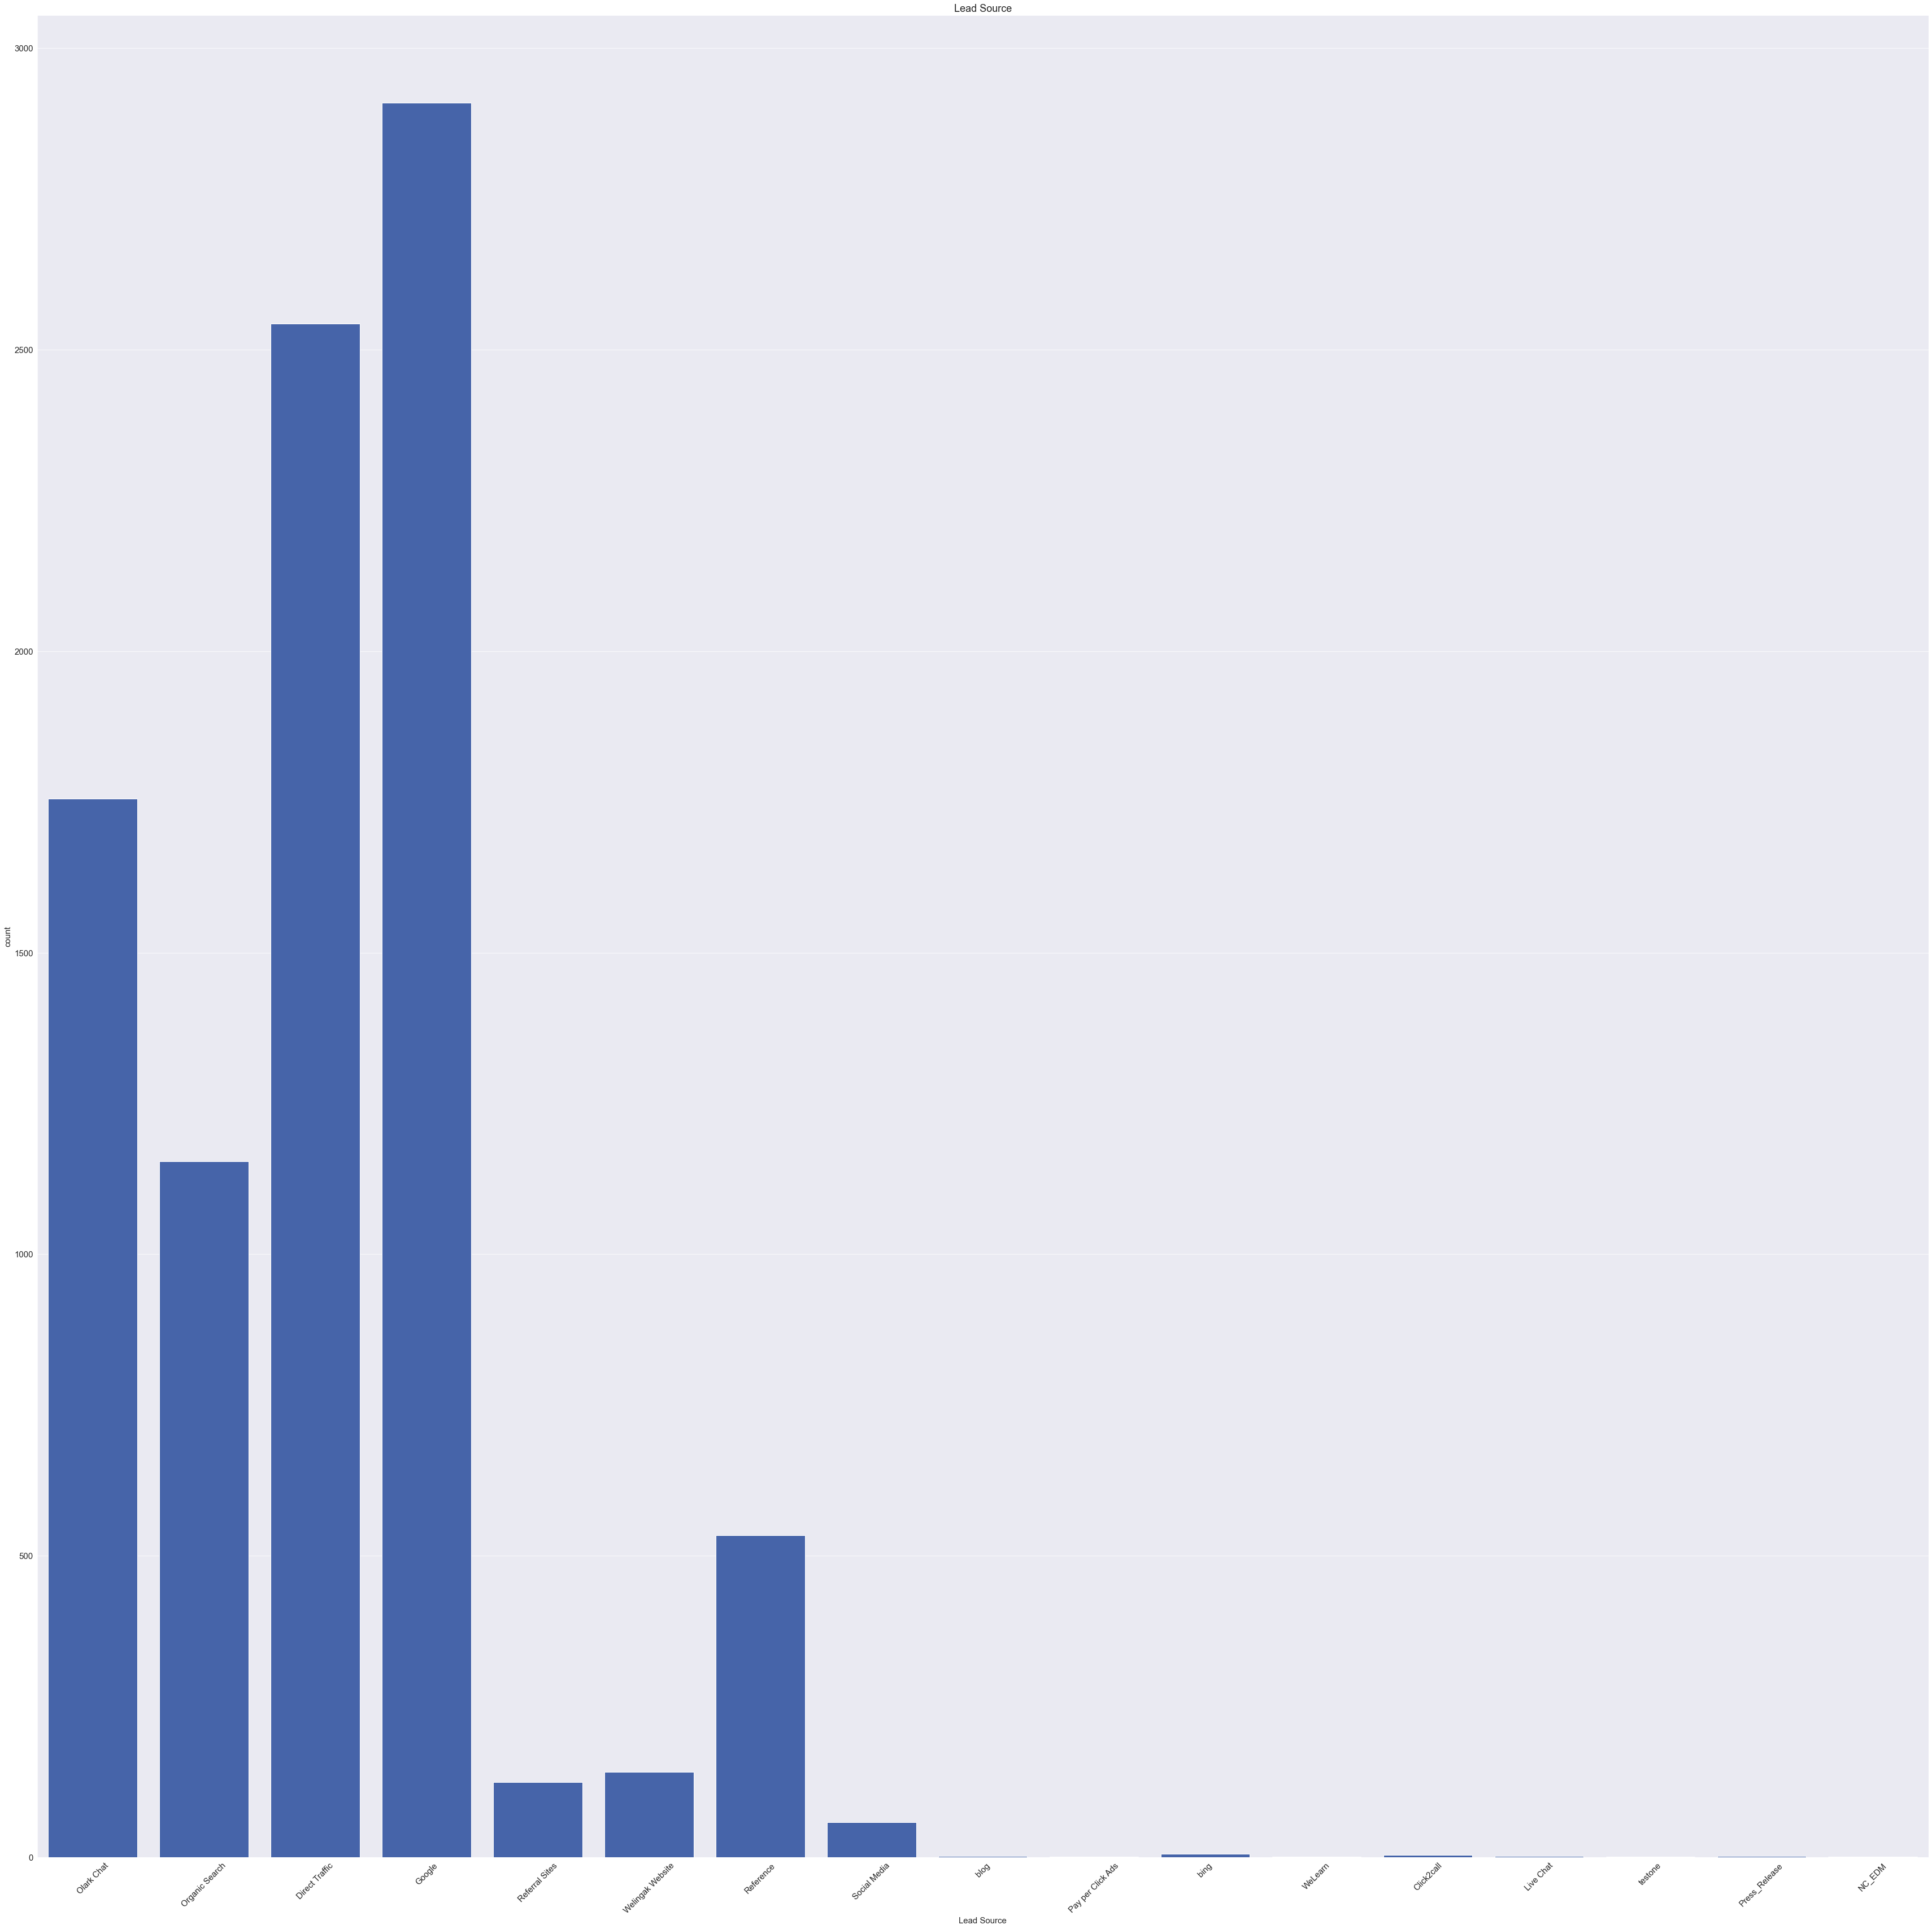

In [56]:
#bar chart counting number of leads by source.
plt.figure(figsize=(60,60))
sns.countplot(leads['Lead Source'],color = randomcolor()).set_title('Lead Source')
plt.xticks(rotation=45)
plt.show()

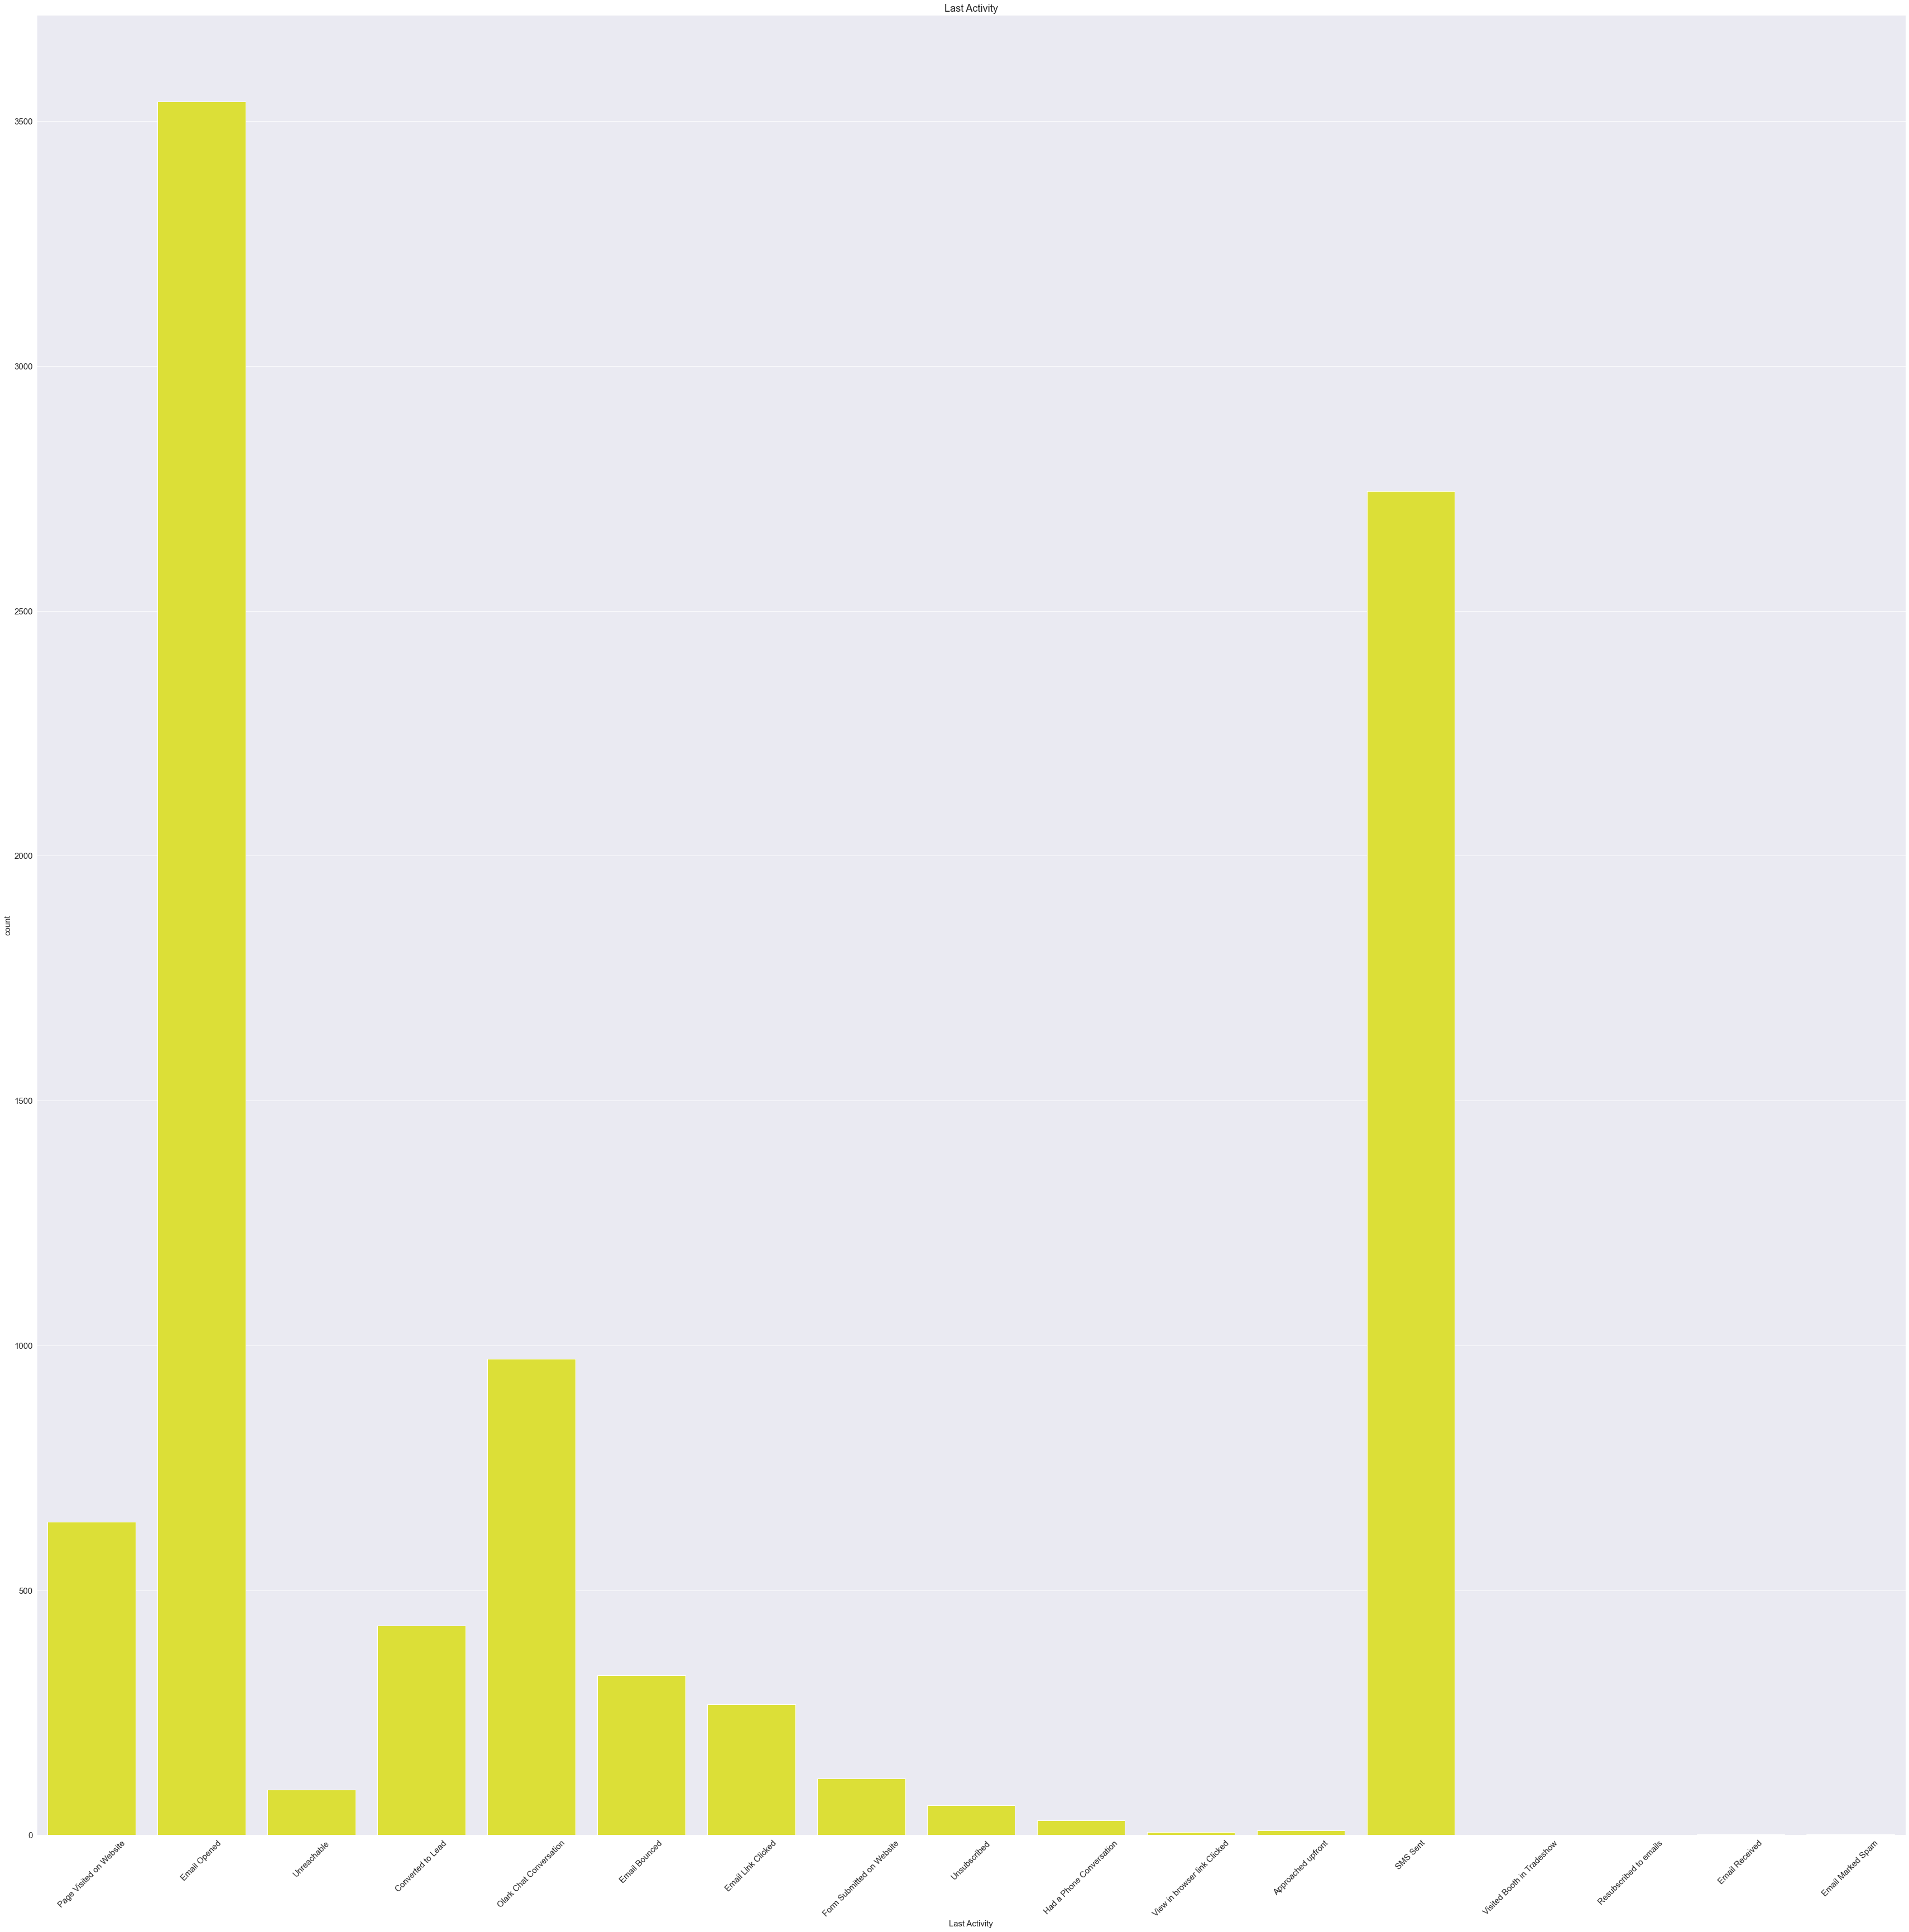

In [57]:
#bar chart counting number of leads by last activity.
plt.figure(figsize=(60,60))
sns.countplot(leads['Last Activity'],color = randomcolor()).set_title('Last Activity')
plt.xticks(rotation=45)
plt.show()

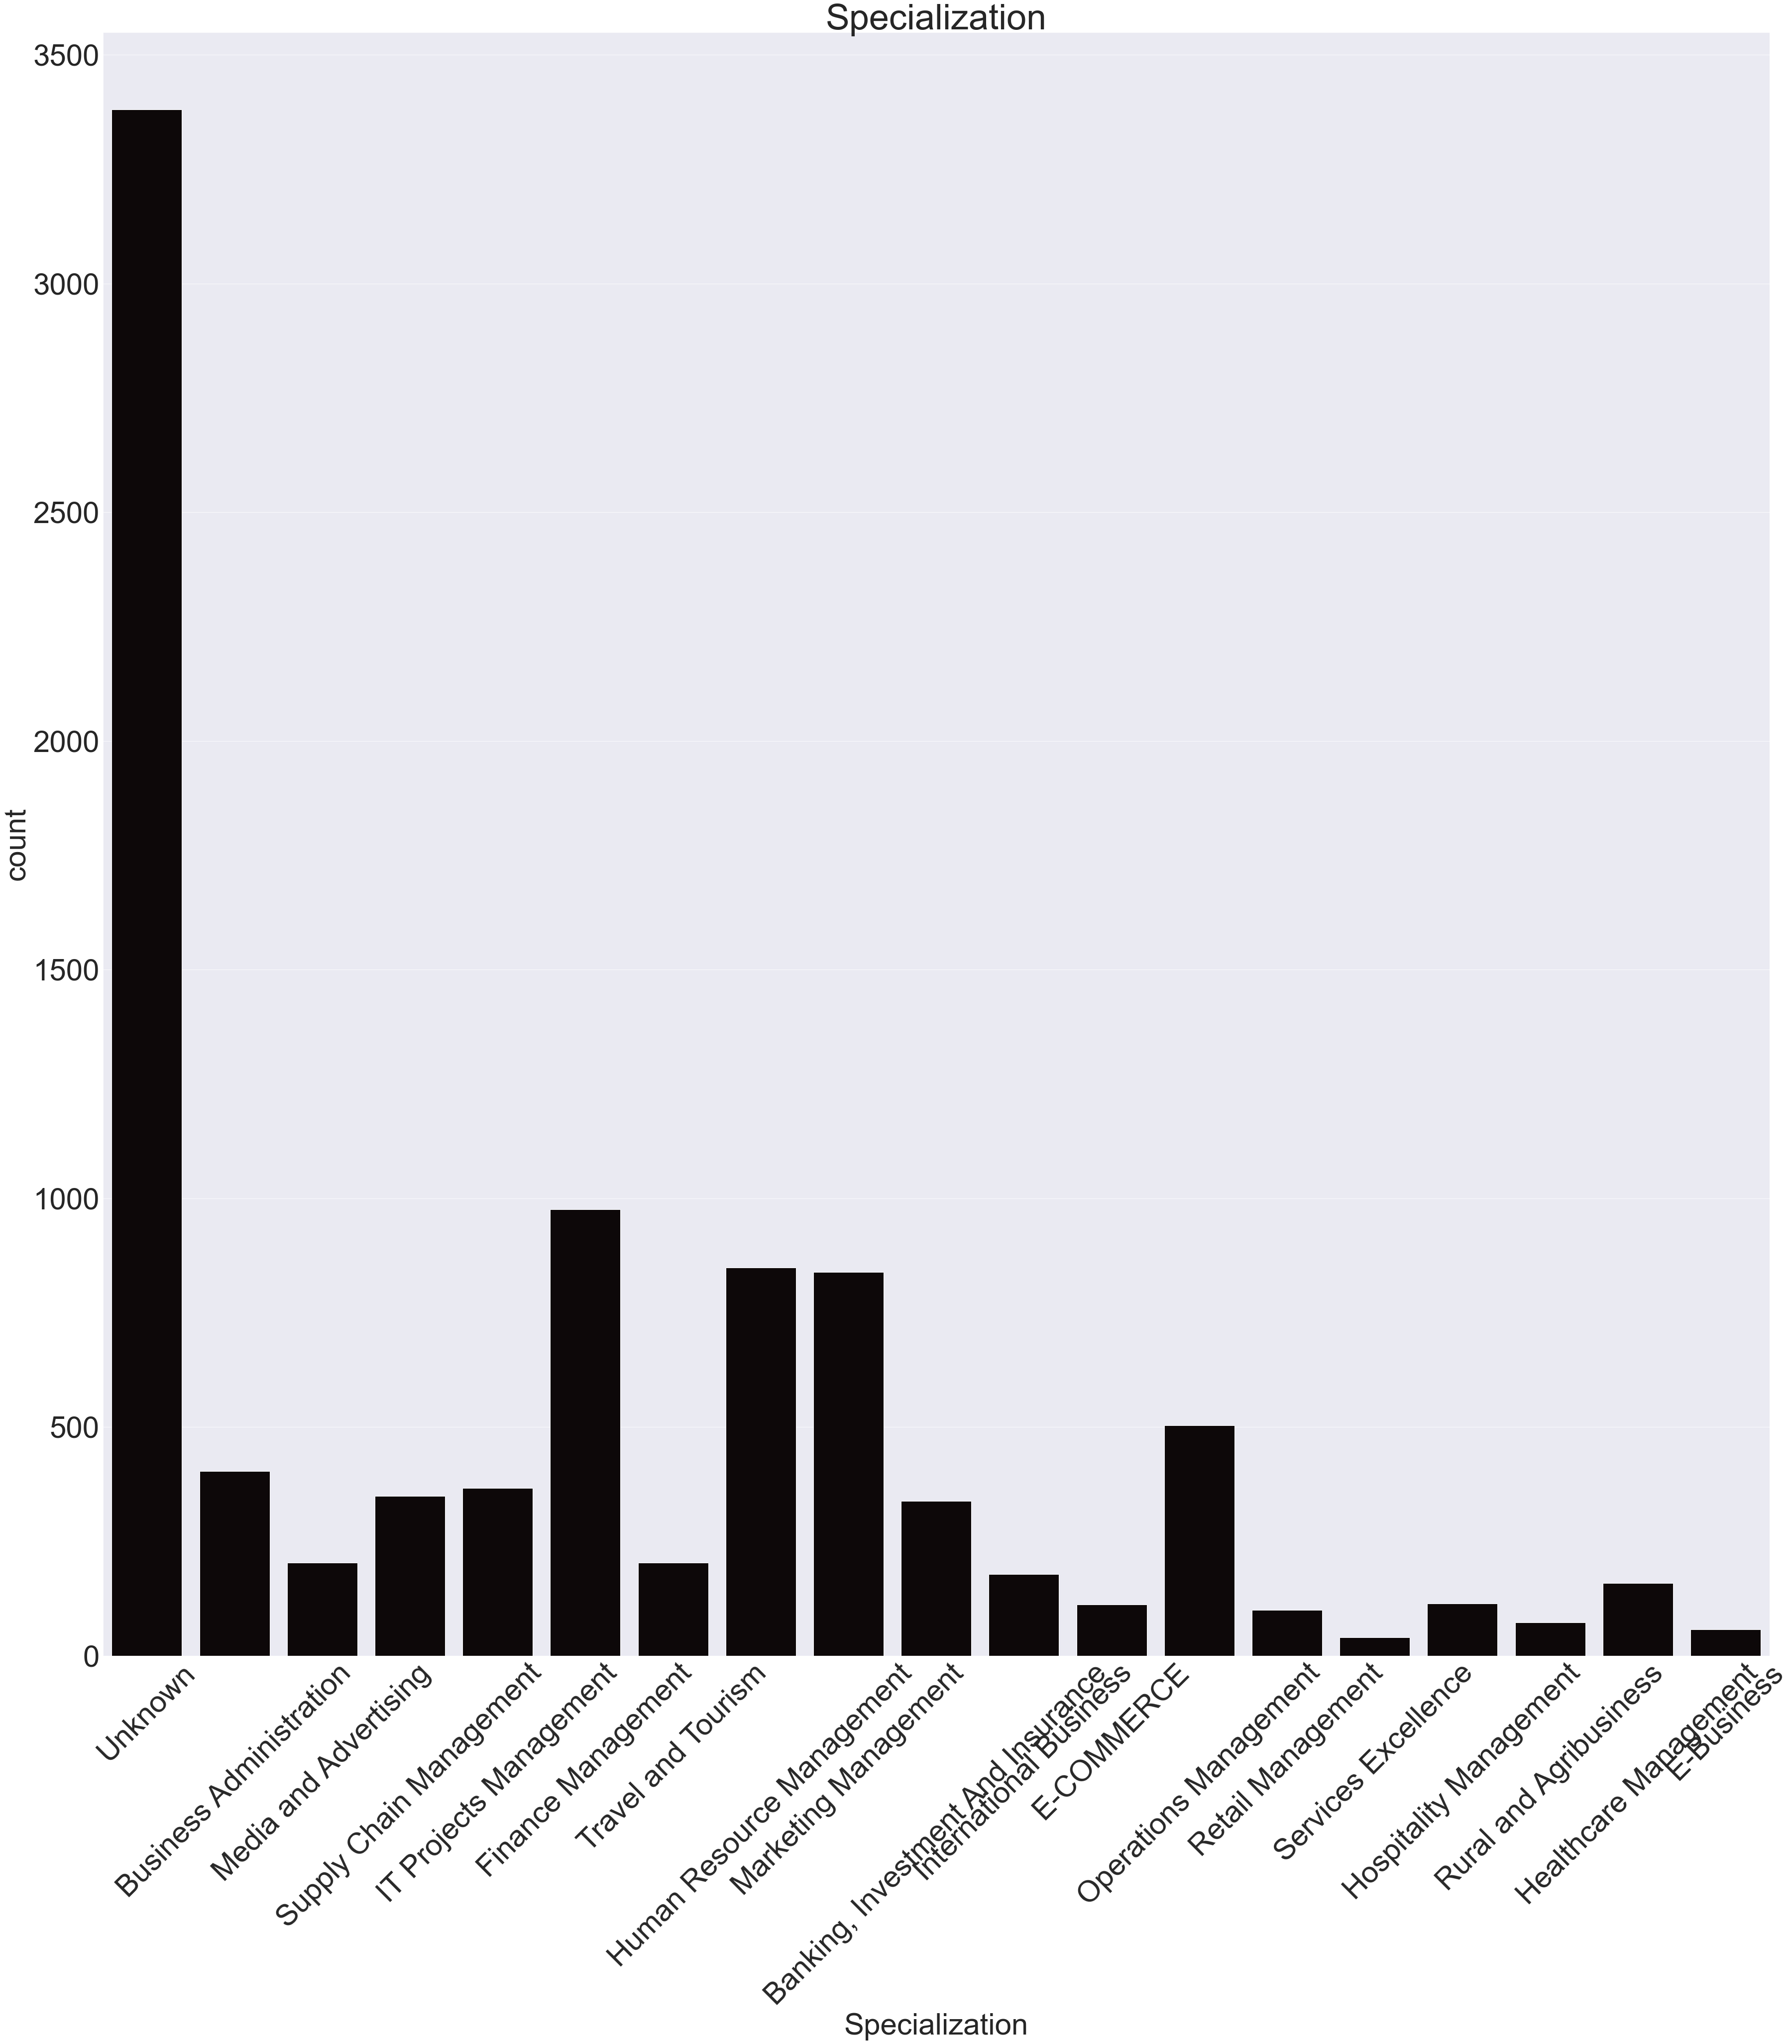

In [58]:
#bar chart counting number of leads by specialization.
plt.figure(figsize=(60,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(leads['Specialization'],color = randomcolor()).set_title('Specialization')
plt.xticks(rotation=45)
plt.show()

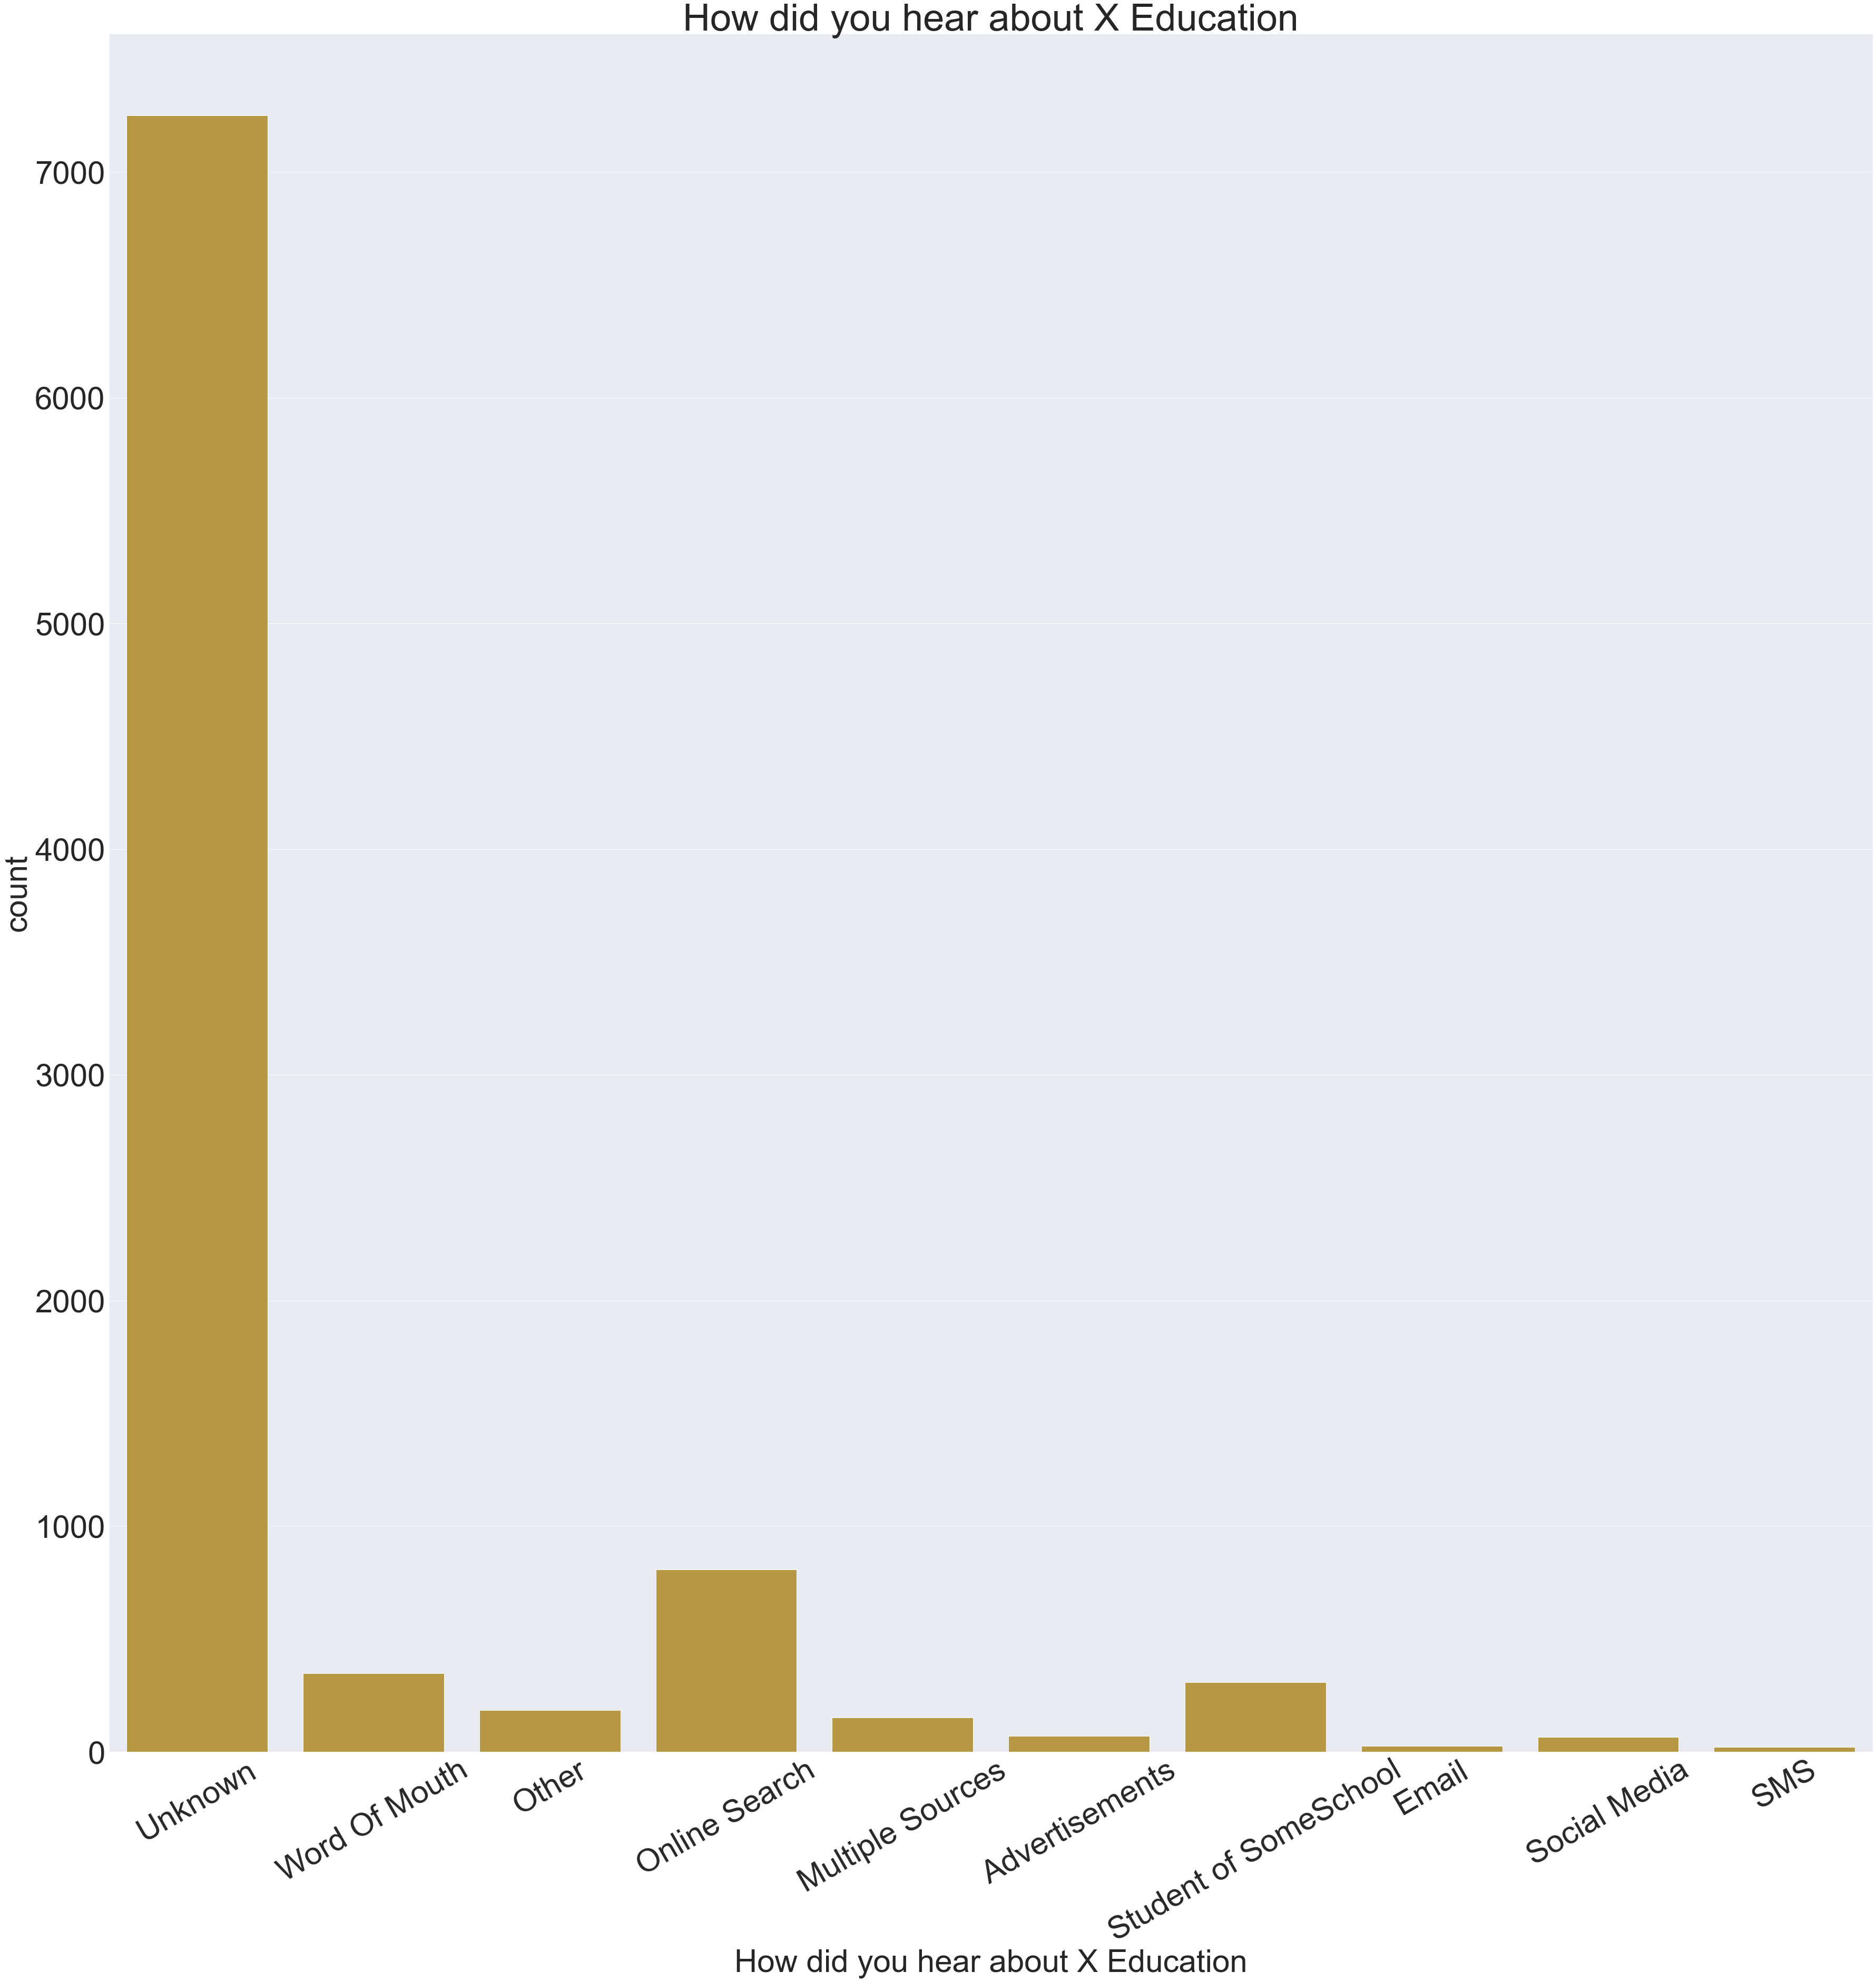

In [59]:
#bar chart counting number of leads by what informed them about the company.
plt.figure(figsize=(60,60))
sns.countplot(leads['How did you hear about X Education'],color = randomcolor()).set_title('How did you hear about X Education')
plt.xticks(rotation=30)
plt.show()

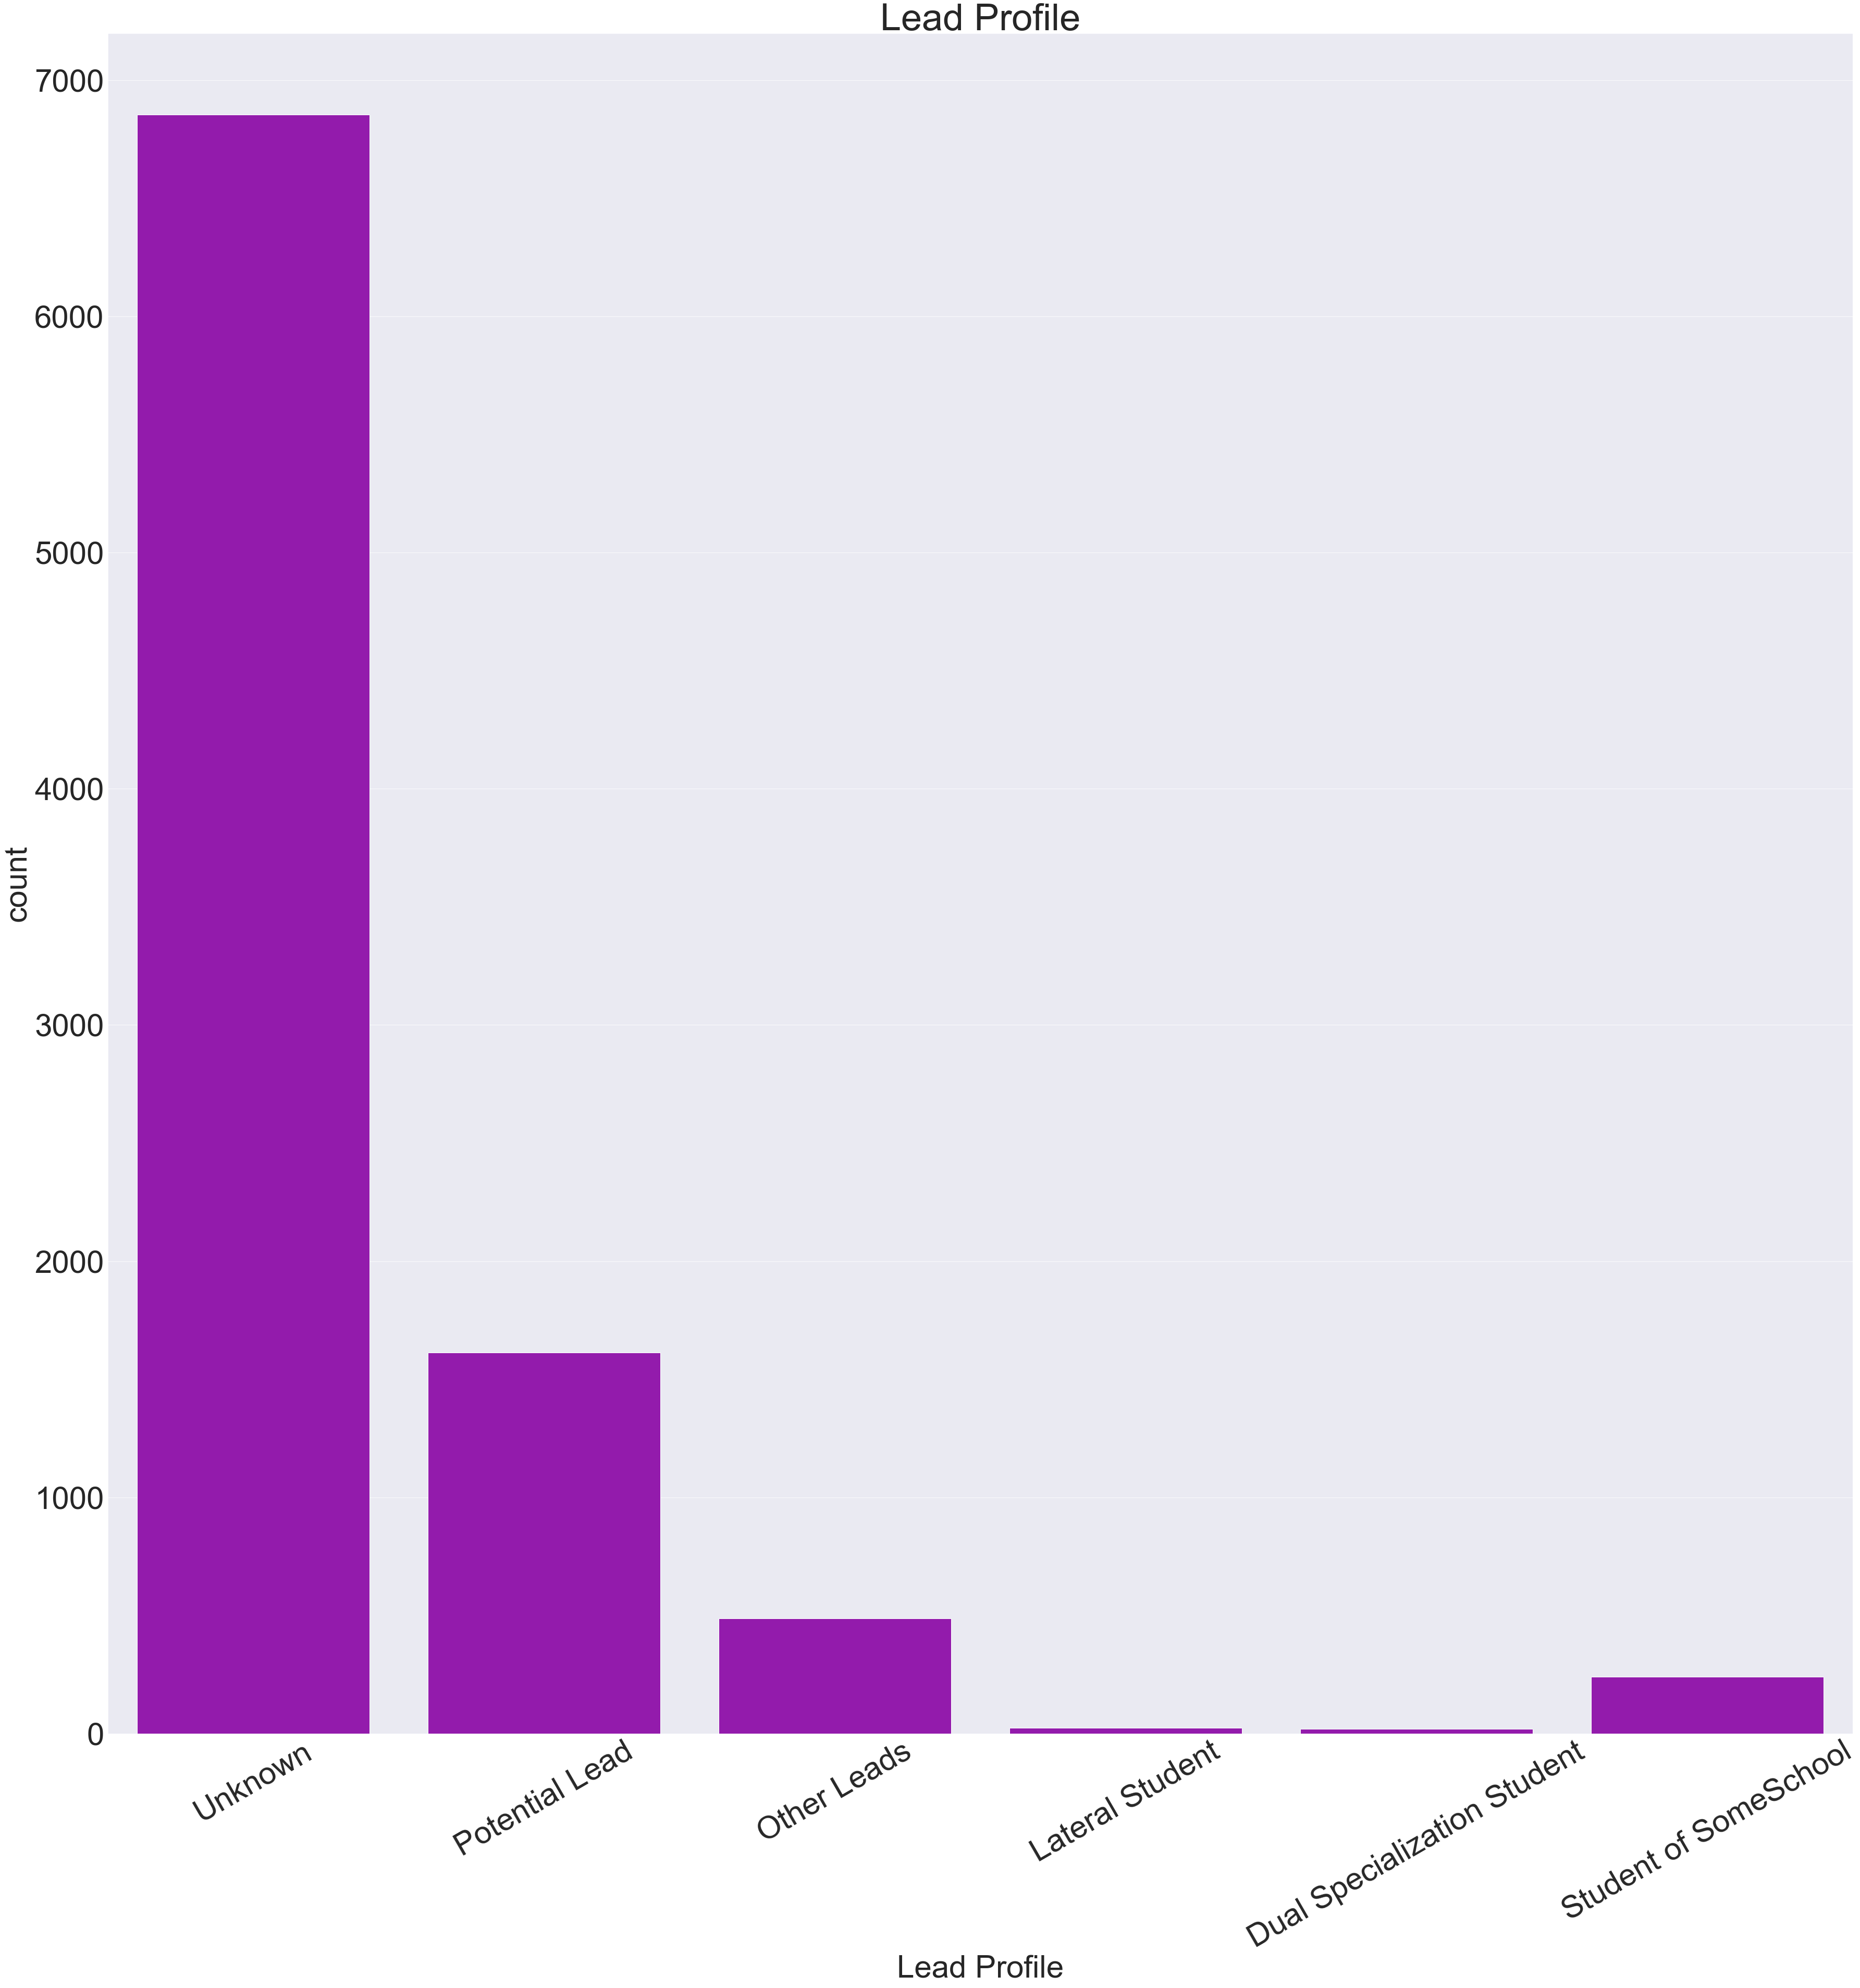

In [60]:
#bar chart counting number of leads by profile.
plt.figure(figsize=(60,60))
sns.countplot(leads['Lead Profile'],color = randomcolor()).set_title('Lead Profile')
plt.xticks(rotation=30)
plt.show()

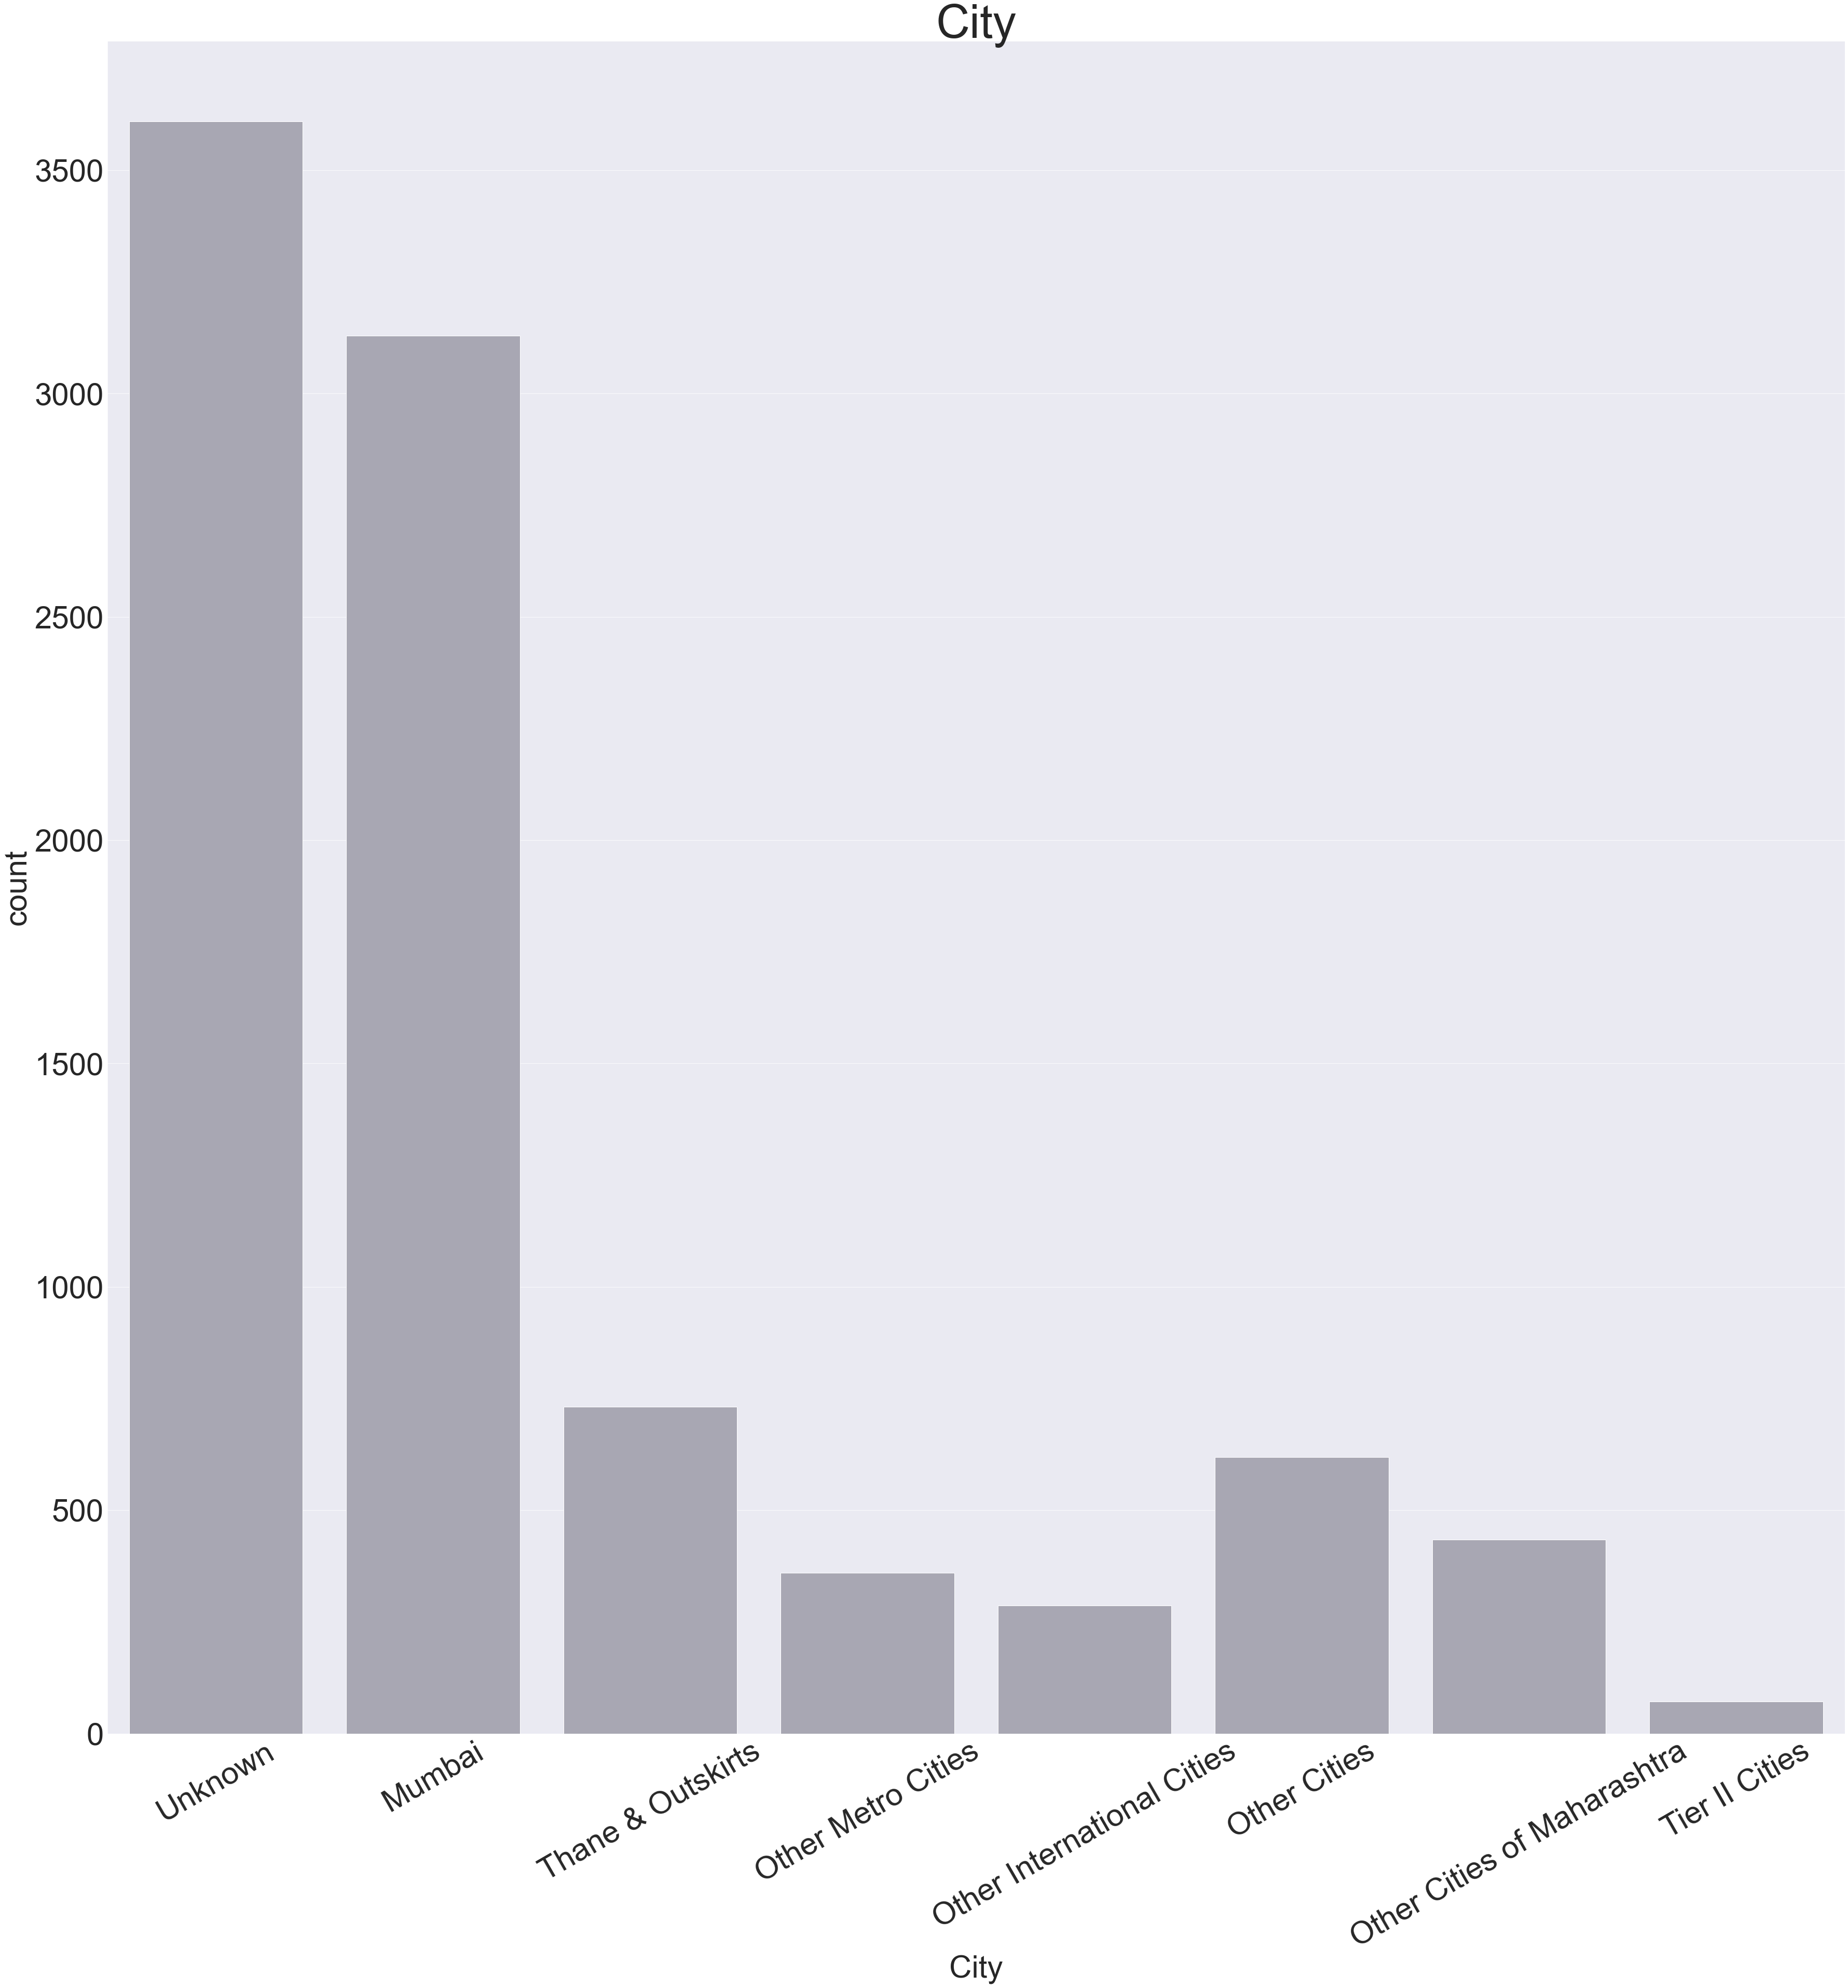

In [61]:
#bar chart counting number of leads by city.
plt.figure(figsize=(60,60))
sns.countplot(leads['City'],color = randomcolor()).set_title('City',size=90)
plt.xticks(rotation=30)
plt.show()

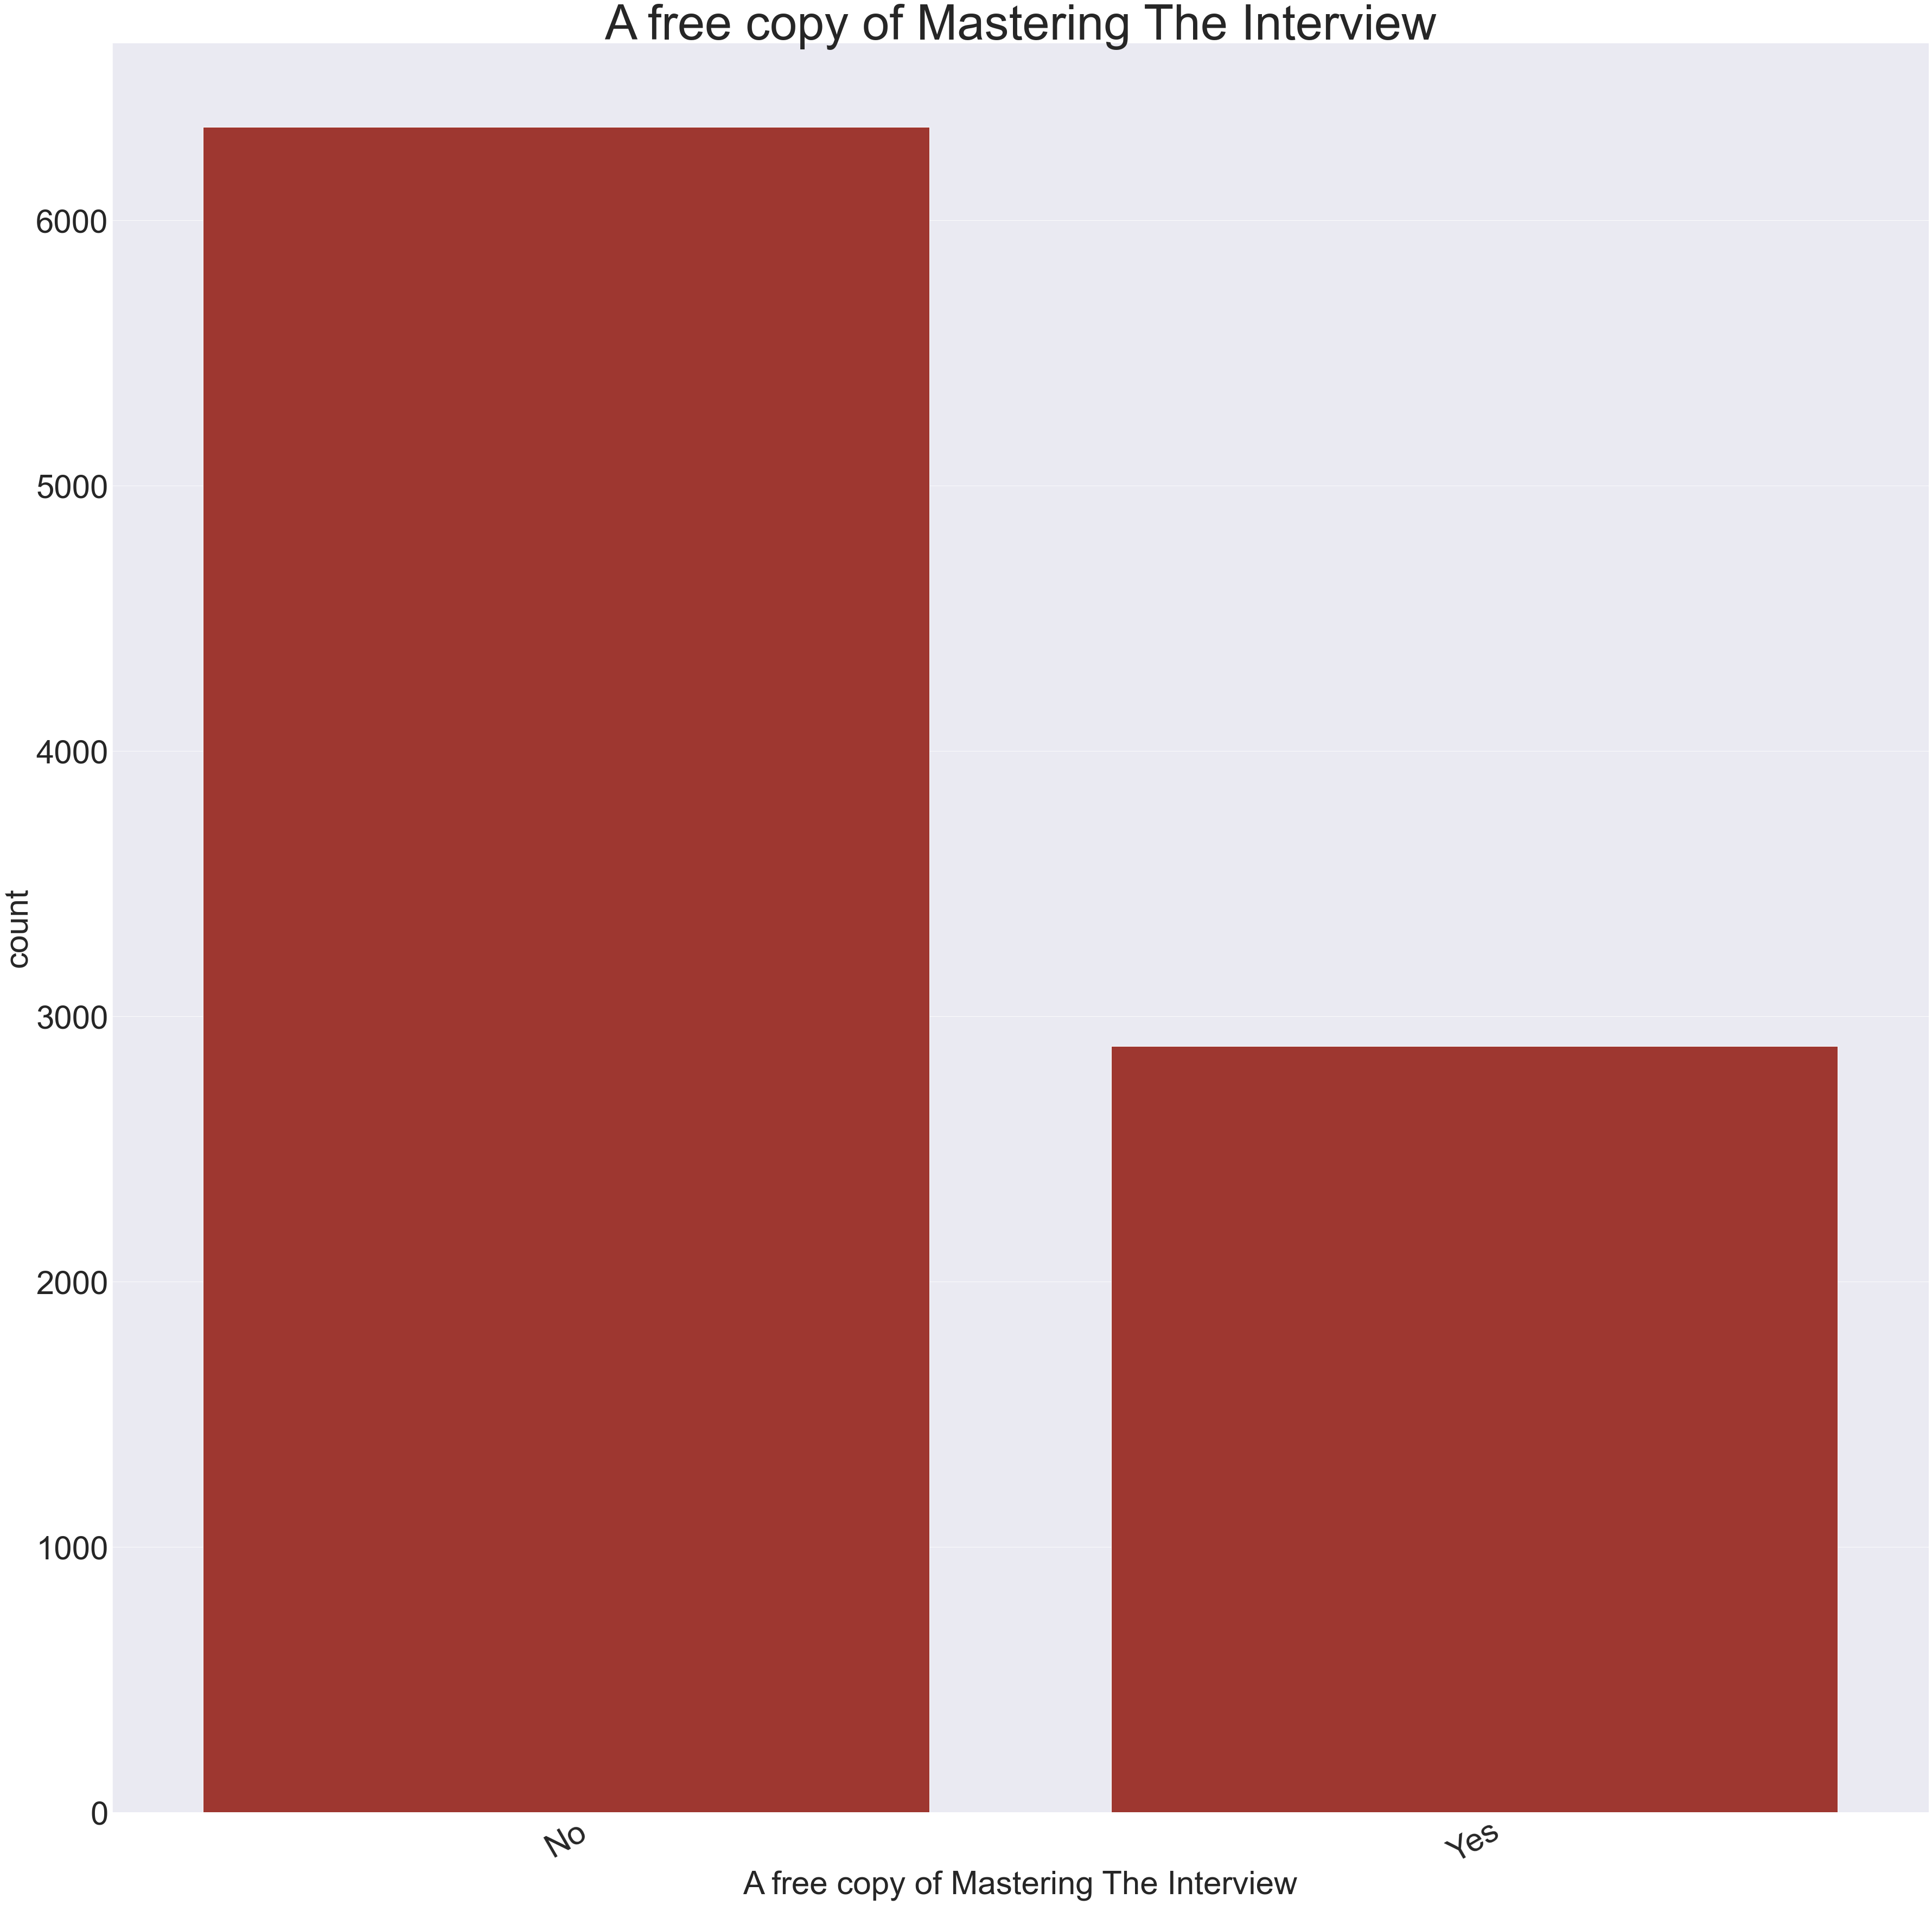

In [62]:
#bar chart counting number of leads by whether they want a free copy of a book or not.
plt.figure(figsize=(60,60))
sns.countplot(leads['A free copy of Mastering The Interview'],color = randomcolor()).set_title('A free copy of Mastering The Interview',size=90)
plt.xticks(rotation=30)
plt.show()

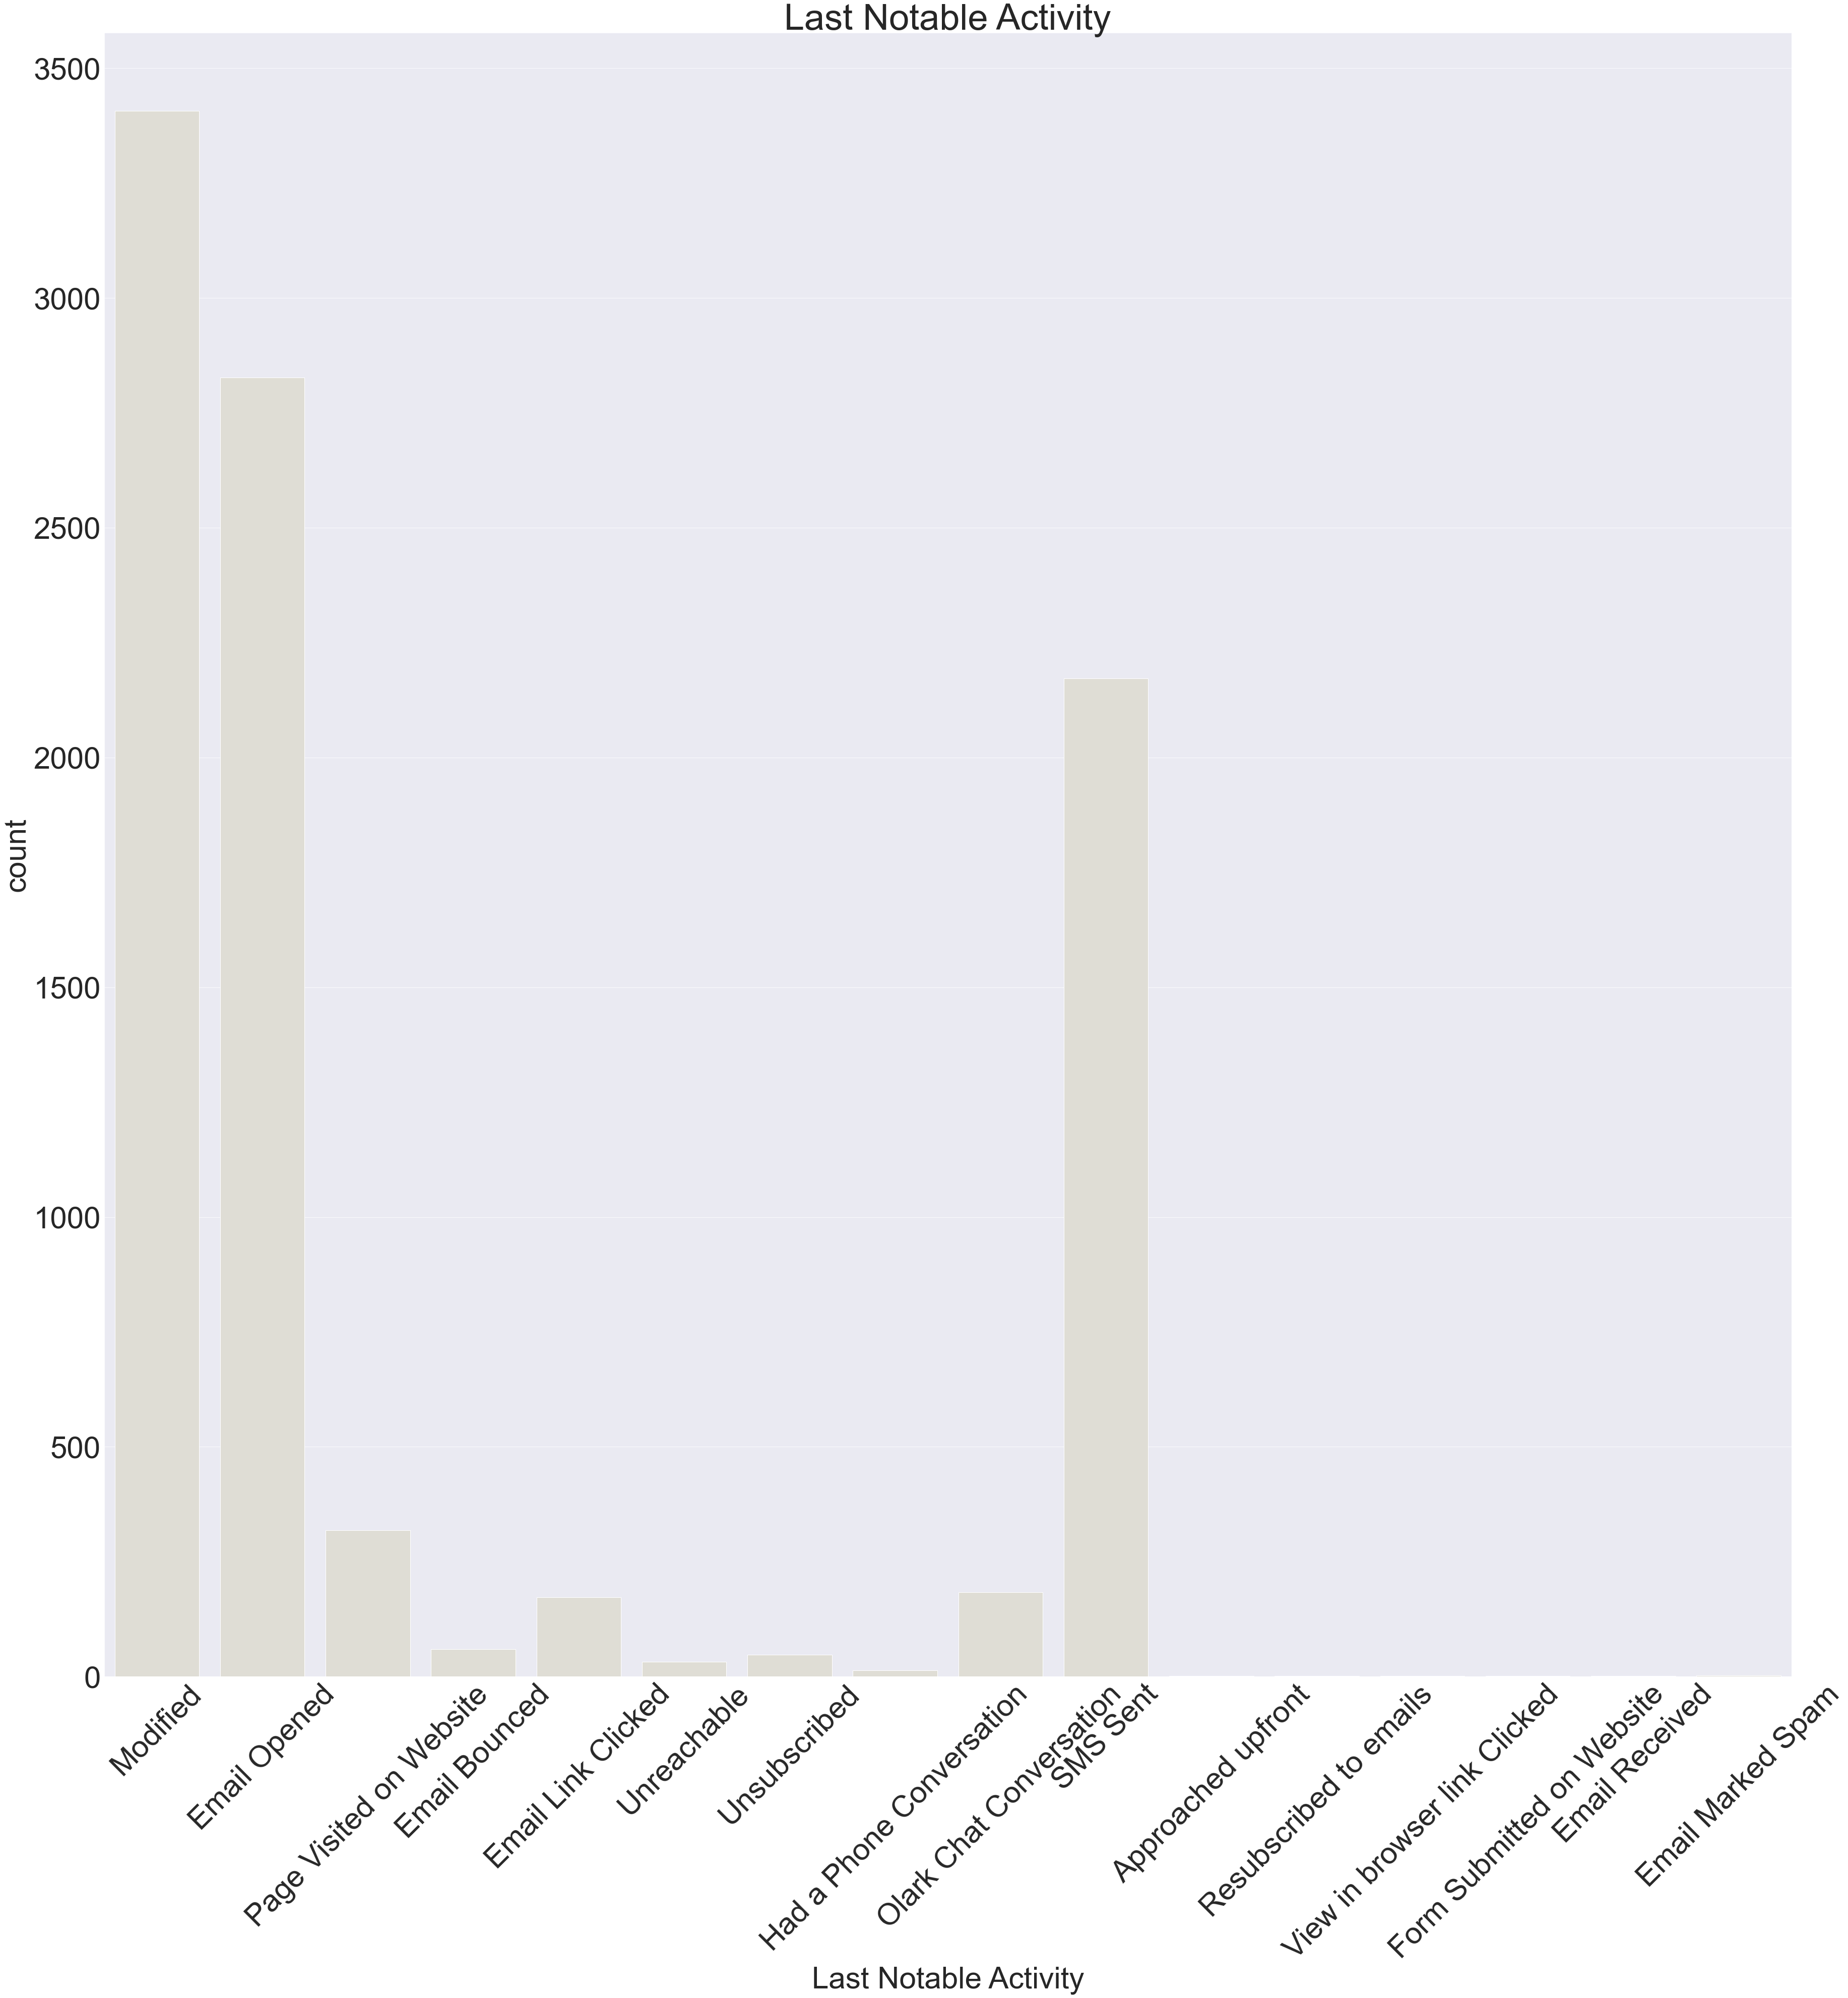

In [63]:
#bar chart counting number of leads by last notable activity.
plt.figure(figsize=(60,60))
sns.countplot(leads['Last Notable Activity'],color = randomcolor()).set_title('Last Notable Activity')
plt.xticks(rotation=45)
plt.show()

#### Checking the contributions of each category in conversion status.

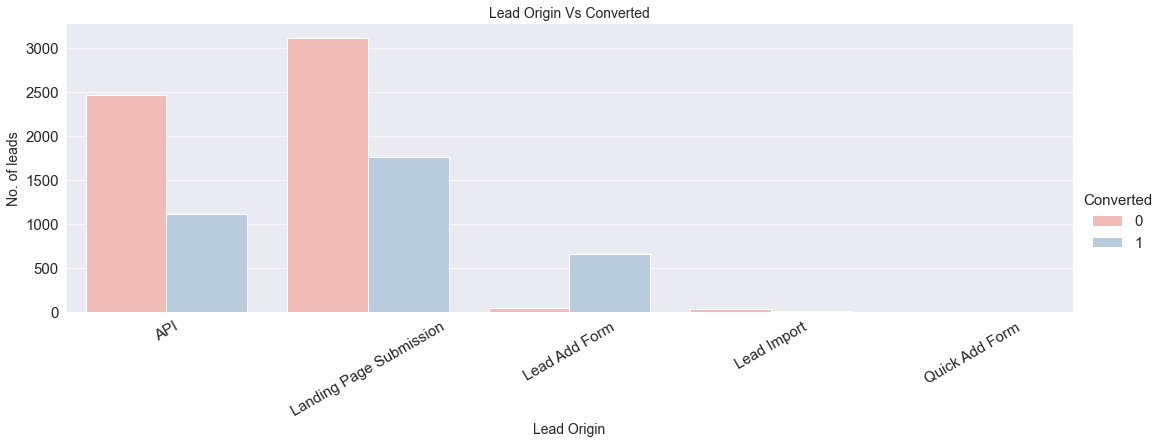

In [64]:
plt.rcParams.update({'font.size': 15})
plot = sns.catplot(x="Lead Origin", hue = "Converted", kind="count", data=leads, palette="Pastel1", aspect = 3);
plt.title('Lead Origin Vs Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

Landing Page submission contributes most to both categories

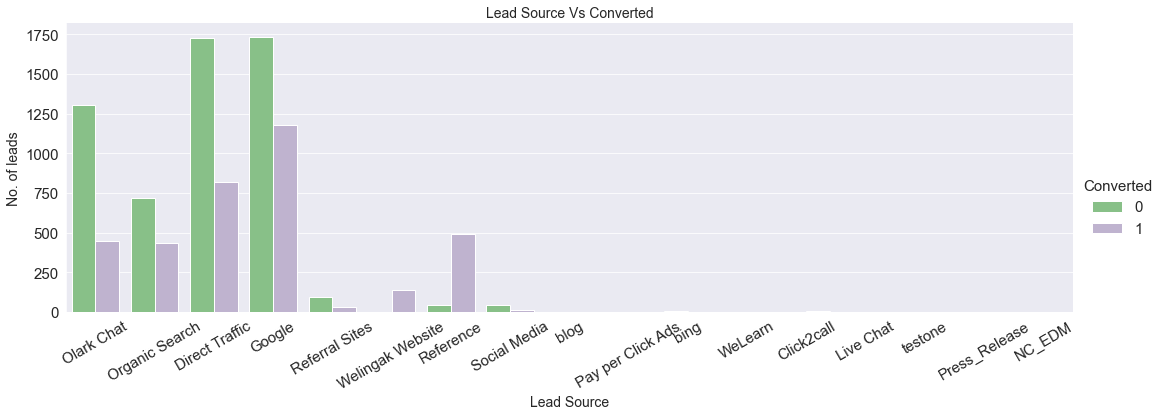

In [65]:
plot = sns.catplot(x="Lead Source", hue = "Converted", kind="count", data=leads, palette="Accent", aspect = 3);
plt.title('Lead Source Vs Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

most converted leads come from google

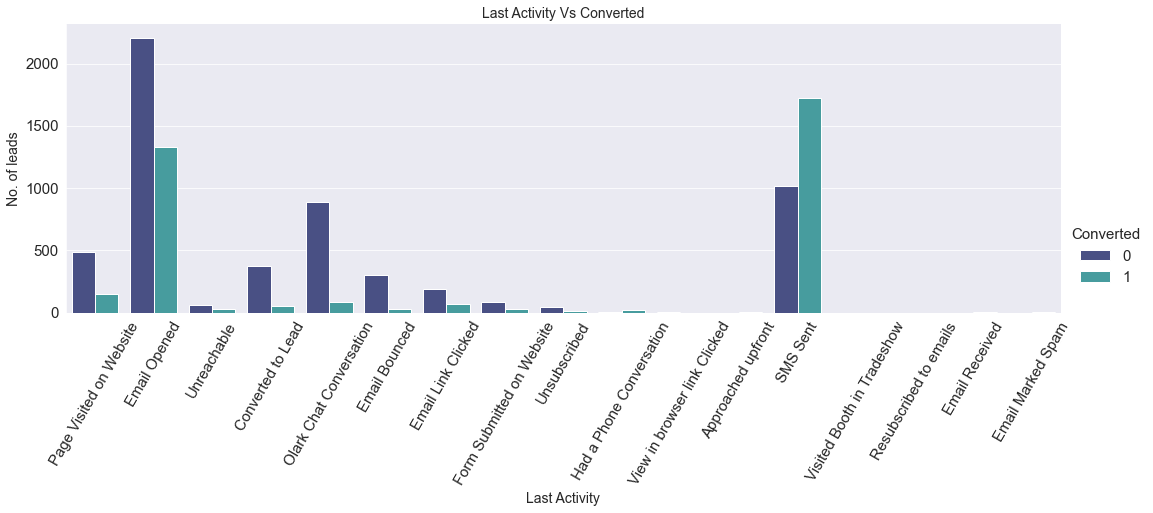

In [66]:
plot = sns.catplot(x="Last Activity", hue = "Converted", kind="count", data=leads, palette="mako", aspect = 3);
plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=60)
plt.show()

most converted leads in category where last activity was 'sms sent'

Certain columns contain 'Unknown' as an entry. In the visualizations, they won't be accounted for as they don't provide any actionable insight.

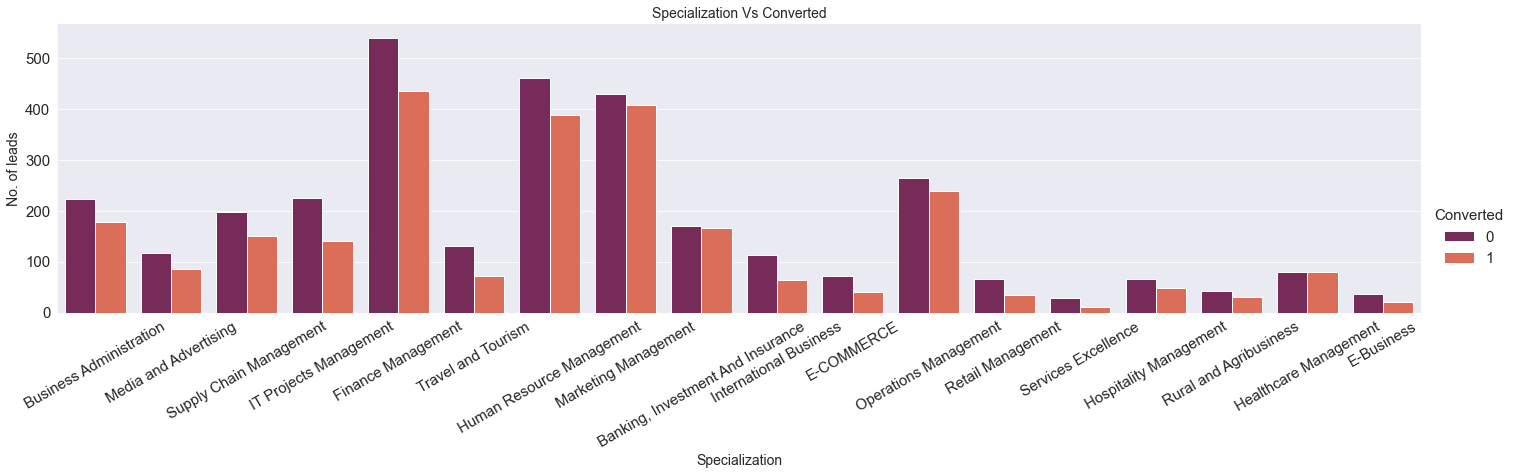

In [67]:
plot = sns.catplot(x="Specialization", hue = "Converted", kind="count", data=leads[leads['Specialization']!="Unknown"], palette="rocket", aspect = 4);
plt.title('Specialization Vs Converted', fontsize = 14)
plt.xlabel("Specialization", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

most converted leads are from IT projects management

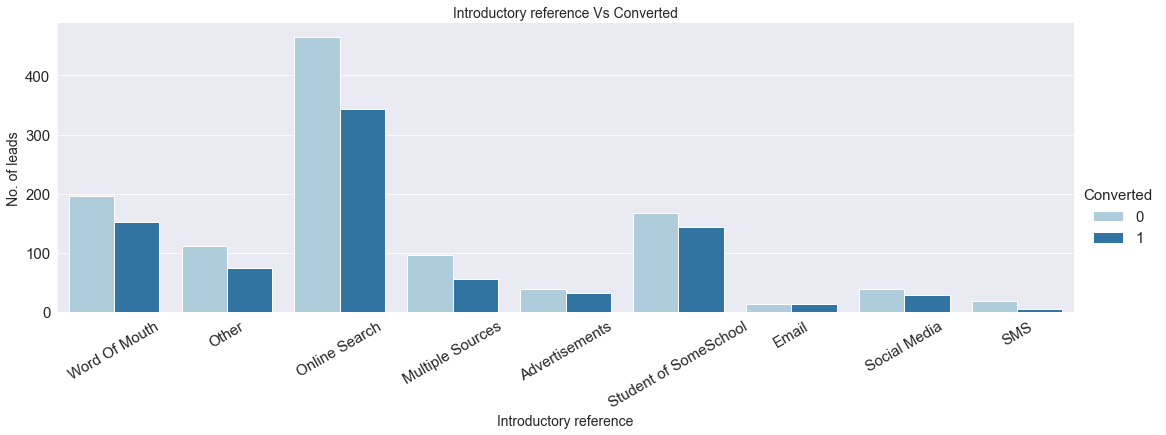

In [68]:
plot = sns.catplot(x="How did you hear about X Education", hue = "Converted", kind="count", data=leads[leads["How did you hear about X Education"]!="Unknown"], palette="Paired", aspect = 3);
plt.title('Introductory reference Vs Converted', fontsize = 14)
plt.xlabel("Introductory reference", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

most converted leads are from online search

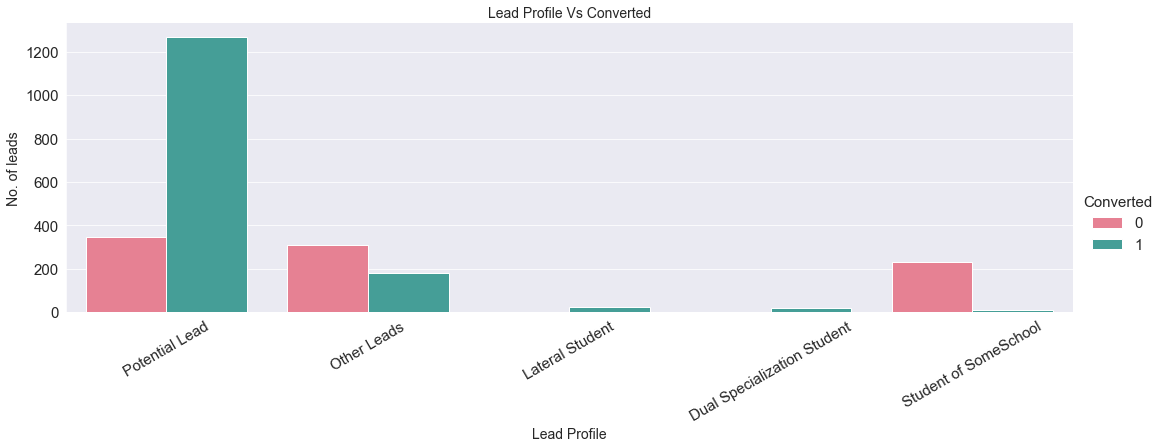

In [69]:
plot = sns.catplot(x="Lead Profile", hue = "Converted", kind="count", data=leads[leads["Lead Profile"]!="Unknown"], palette="husl", aspect = 3);
plt.title('Lead Profile Vs Converted', fontsize = 14)
plt.xlabel("Lead Profile", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

most converted leads have a profile of 'potential lead'

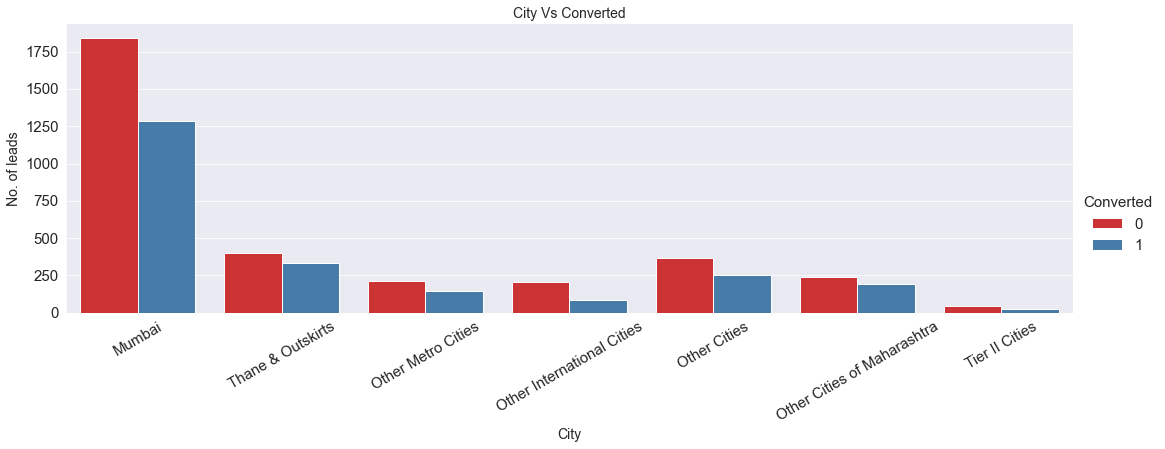

In [70]:
plot = sns.catplot(x="City", hue = "Converted", kind="count", data=leads[leads["City"]!="Unknown"], palette="Set1", aspect = 3);
plt.title('City Vs Converted', fontsize = 14)
plt.xlabel("City", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

most converted leads are from Mumbai

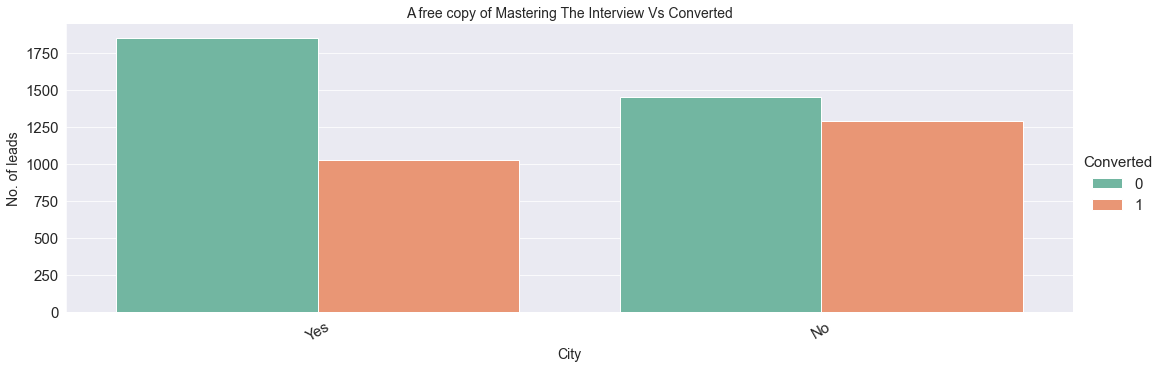

In [71]:
plot = sns.catplot(x="A free copy of Mastering The Interview", hue = "Converted", kind="count", data=leads[leads["City"]!="Unknown"], palette="Set2", aspect = 3);
plt.title('A free copy of Mastering The Interview Vs Converted', fontsize = 14)
plt.xlabel("City", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

People not taking the free book are more likely to convert than those who've taken the free book.

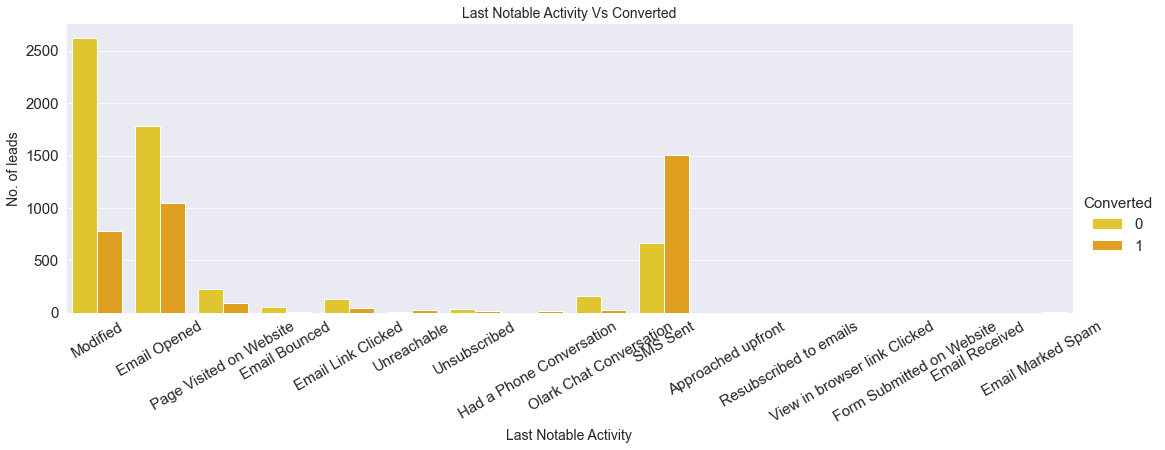

In [72]:
plot = sns.catplot(x="Last Notable Activity", hue = "Converted", kind="count", data=leads, palette="Wistia", aspect = 3);
plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 14)
plt.ylabel("No. of leads", fontsize = 14)
plt.xticks(rotation=30)
plt.show()

most converted leads have last notable activity as 'modified'

### Outlier Analysis

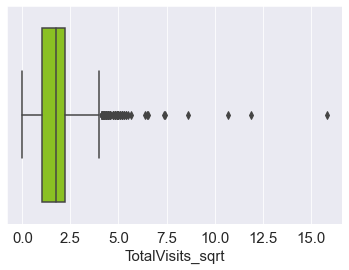

In [73]:
#checking the spread of the numerical variables.
sns.boxplot(leads['TotalVisits_sqrt'],color=randomcolor())
plt.show()

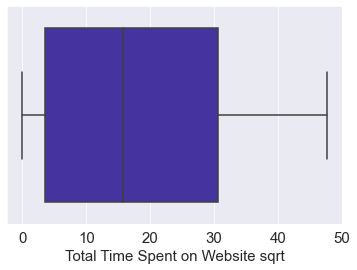

In [74]:
sns.boxplot(leads['Total Time Spent on Website sqrt'],color=randomcolor())
plt.show()

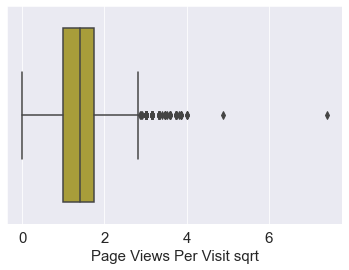

In [75]:
sns.boxplot(leads['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

In [76]:
leads.shape

(9240, 15)

Since we reduced the skewness as much as possible, we can go with the assumption of normally distributed data much more safely now. 
In a normal distribution, 99.7% of the data is contained within +-3 SD of the mean. We can use this to cut down on outliers.

In [77]:
out_num_leads=leads[['Page Views Per Visit sqrt','TotalVisits_sqrt']]
other_leads = pd.concat([leads.select_dtypes(include=['object']),leads['Total Time Spent on Website sqrt']],axis =1)
other_leads = pd.concat([other_leads,leads["Lead Number"],leads['Converted']],axis = 1)
q = out_num_leads.quantile(0.997)
out_num_leads = out_num_leads[out_num_leads < q]
out_num_leads.isnull().sum()

Page Views Per Visit sqrt    31
TotalVisits_sqrt             32
dtype: int64

Filling in missing values left by outliers by median.

In [78]:
out_num_leads['Page Views Per Visit sqrt'].fillna(out_num_leads['Page Views Per Visit sqrt'].median(), inplace=True)
out_num_leads['TotalVisits_sqrt'].fillna(out_num_leads['TotalVisits_sqrt'].median(), inplace=True)

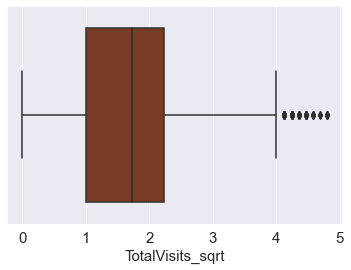

In [79]:
sns.boxplot(out_num_leads['TotalVisits_sqrt'],color=randomcolor())
plt.show()

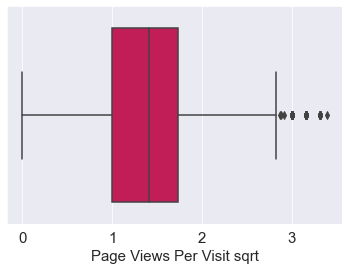

In [80]:
sns.boxplot(out_num_leads['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

One iteration of the process didn't remove as many outlying points as expected. We'll have 1 more iteration.

In [81]:
q = out_num_leads.quantile(0.997)
out_num_leads = out_num_leads[out_num_leads < q]
out_num_leads.isnull().sum()

Page Views Per Visit sqrt    44
TotalVisits_sqrt             36
dtype: int64

Filling in missing values left by outliers by median as outliers are still there.

In [82]:
out_num_leads['Page Views Per Visit sqrt'].fillna(out_num_leads['Page Views Per Visit sqrt'].median(), inplace=True)
out_num_leads['TotalVisits_sqrt'].fillna(out_num_leads['TotalVisits_sqrt'].median(), inplace=True)

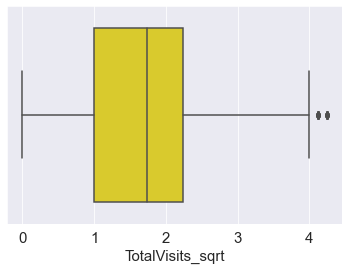

In [83]:
sns.boxplot(out_num_leads['TotalVisits_sqrt'],color=randomcolor())
plt.show()

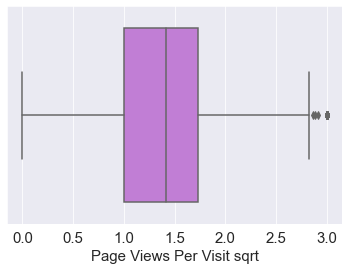

In [84]:
sns.boxplot(out_num_leads['Page Views Per Visit sqrt'],color=randomcolor())
plt.show()

Since only a handful of outliers are left, we can proceed. We shouldn't do this process when a few outlying values are left since we risk losing non outlying values too.

In [85]:
cleaned_leads=pd.concat([other_leads,out_num_leads],axis = 1)
cleaned_leads.head()

Prospect ID              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852  Landing Page Submission   

      Lead Source            Last Activity           Specialization  \
0      Olark Chat  Page Visited on Website                  Unknown   
1  Organic Search             Email Opened                  Unknown   
2  Direct Traffic             Email Opened  Business Administration   
3  Direct Traffic              Unreachable    Media and Advertising   
4          Google        Converted to Lead                  Unknown   

  How did you hear about X Education    Lead Profile     City  \
0                            Unknown         Unknown  Unknown   
1                            Unknown         Unknown  Unknown   
2                            Unknown  Potential Lead   Mumbai   
3                      Word Of Mouth         Unknown   Mumbai   
4                              Other         Unknown   Mumbai   

  A free copy of Mastering The Interview Last Notable Activity  \
0                                     No              Modified   
1                                     No          Email Opened   
2                                    Yes          Email Opened   
3                                     No              Modified   
4                                     No              Modified   

   Total Time Spent on Website sqrt  Lead Number  Converted  \
0                          0.000000       660737          0   
1                         25.961510       660728          0   
2                         39.140772       660727          1   
3                         17.464249       660719          0   
4                         37.788887       660681          1   

   Page Views Per Visit sqrt  TotalVisits_sqrt  
0                   0.000000          0.000000  
1                   1.581139          2.236068  
2                   1.414214          1.414214  
3                   1.000000          1.000000  
4                   1.000000          1.414214

In [86]:
cleaned_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Last Activity                           9240 non-null   object 
 4   Specialization                          9240 non-null   object 
 5   How did you hear about X Education      9240 non-null   object 
 6   Lead Profile                            9240 non-null   object 
 7   City                                    9240 non-null   object 
 8   A free copy of Mastering The Interview  9240 non-null   object 
 9   Last Notable Activity                   9240 non-null   object 
 10  Total Time Spent on Website sqrt        9240 non-null   floa

### Data Preparation

#### encoding

In [87]:
#importing required modules
from sklearn.preprocessing import OneHotEncoder

In [88]:
#removing ID variable from variables whose dummies are being created.
dummies_needed=cleaned_leads.drop("Prospect ID",axis=1).select_dtypes(include=['object'])
dummies_needed.columns

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'How did you hear about X Education', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [89]:
#getting dummies
dummy = pd.get_dummies(dummies_needed)
dummy.head()

Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   

   Lead Origin_Quick Add Form  Lead Source_Click2call  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   

   Lead Source_Direct Traffic  Lead Source_Google  Lead Source_Live Chat  \
0                           0                   0                      0   
1                           0                   0                      0   
2                           1                   0                      0   
3                           1                   0                      0   
4                           0                   1                      0   

   Lead Source_NC_EDM  ...  Last Notable Activity_Form Submitted on Website  \
0                   0  ...                                                0   
1                   0  ...                                                0   
2                   0  ...                                                0   
3                   0  ...                                                0   
4                   0  ...                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   

In [90]:
#removing original categorical variables
cleaned_leads_dummified = pd.concat([cleaned_leads,dummy],axis = 1)
for x in dummies_needed.columns:
        del cleaned_leads_dummified[x]
cleaned_leads_dummified.head()

Prospect ID  Total Time Spent on Website sqrt  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620                          0.000000   
1  2a272436-5132-4136-86fa-dcc88c88f482                         25.961510   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a                         39.140772   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc                         17.464249   
4  3256f628-e534-4826-9d63-4a8b88782852                         37.788887   

   Lead Number  Converted  Page Views Per Visit sqrt  TotalVisits_sqrt  \
0       660737          0                   0.000000          0.000000   
1       660728          0                   1.581139          2.236068   
2       660727          1                   1.414214          1.414214   
3       660719          0                   1.000000          1.000000   
4       660681          1                   1.000000          1.414214   

   Lead Origin_API  Lead Origin_Landing Page Submission  \
0                1                                    0   
1                1                                    0   
2                0                                    1   
3                0                                    1   
4                0                                    1   

   Lead Origin_Lead Add Form  Lead Origin_Lead Import  ...  \
0                          0                        0  ...   
1                          0                        0  ...   
2                          0                        0  ...   
3                          0                        0  ...   
4                          0                        0  ...   

   Last Notable Activity_Form Submitted on Website  \
0                                                0   
1                                                0   
2                                                0   
3                                                0   
4                                                0   

   Last Notable Activity_Had a Phone Conversation  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Last Notable Activity_Modified  \
0                               1   
1                               0   
2                               0   
3                               1   
4                               1   

   Last Notable Activity_Olark Chat Conversation  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Page Visited on Website  \
0                                              0   
1                                              0   
2                                              0   
3                                              0   
4                                              0   

   Last Notable Activity_Resubscribed to emails  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
0                               0                                  0   
1                               0                                  0   
2                               0                                  0   
3                               0                                  0   
4                               0                                  0   

   Last Notable Activity_Unsubscribed  \
0                                   0   
1                                   0   
2                                   

### test train split, standardization

In [91]:
#importing reqd libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [92]:
#removing ID since it has no role in training the ML model.
cleaned_leads_dummified_final = cleaned_leads_dummified.drop("Prospect ID",axis = 1)
Y = cleaned_leads_dummified_final.Converted
X = cleaned_leads_dummified_final.drop("Converted",axis = 1)

In [93]:
X_train, X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)


In [94]:
#scaling the variables
sc= StandardScaler()
X_train_std=sc.fit_transform(X_train.drop("Lead Number",axis=1))

In [95]:
X_train_std

array([[-1.24357164, -1.59171528, -1.5213129 , ..., -0.06229109,
        -0.06352963, -0.01243508],
       [ 1.31102782, -0.34587912, -0.09566514, ..., -0.06229109,
        -0.06352963, -0.01243508],
       [ 0.17898971, -0.15494693,  0.4948575 , ..., -0.06229109,
        -0.06352963, -0.01243508],
       ...,
       [-1.24357164, -1.59171528, -1.5213129 , ..., -0.06229109,
        -0.06352963, -0.01243508],
       [-0.27609154,  0.56613624,  0.22474188, ..., -0.06229109,
        -0.06352963, -0.01243508],
       [ 1.83206345, -0.34587912, -0.09566514, ..., -0.06229109,
        -0.06352963, -0.01243508]])

### Feature Importances, Initial Modeling

In [96]:
from sklearn.linear_model import LogisticRegression

In [97]:
# Fitting Logistic model 
logit_model= LogisticRegression(solver='liblinear')
logit_model.fit(X_train_std, Y_train)
# Rank features by importance
feature= pd.DataFrame()
feature['column']= X_train.drop("Lead Number", axis=1).columns
feature['importance']= logit_model.coef_[0]
feature.sort_values('importance', ascending=False, inplace=True)
feature

column  importance
0      Total Time Spent on Website sqrt    1.287743
5             Lead Origin_Lead Add Form    0.678704
21         Lead Source_Welingak Website    0.644231
74          Lead Profile_Potential Lead    0.467232
99       Last Notable Activity_SMS Sent    0.391937
..                                  ...         ...
4   Lead Origin_Landing Page Submission   -0.301639
76                 Lead Profile_Unknown   -0.301848
27          Last Activity_Email Bounced   -0.337800
75   Lead Profile_Student of SomeSchool   -0.427370
1             Page Views Per Visit sqrt   -0.689961

[103 rows x 2 columns]

Features having positive influence on the model are stated below

In [98]:
feature[feature["importance"]>0]

column  importance
0                     Total Time Spent on Website sqrt    1.287743
5                            Lead Origin_Lead Add Form    0.678704
21                        Lead Source_Welingak Website    0.644231
74                         Lead Profile_Potential Lead    0.467232
99                      Last Notable Activity_SMS Sent    0.391937
71            Lead Profile_Dual Specialization Student    0.337151
37                              Last Activity_SMS Sent    0.293863
13                              Lead Source_Olark Chat    0.292450
25                    Last Activity_Approached upfront    0.284505
2                                     TotalVisits_sqrt    0.260556
100                  Last Notable Activity_Unreachable    0.181112
30                          Last Activity_Email Opened    0.139891
101                 Last Notable Activity_Unsubscribed    0.113704
94      Last Notable Activity_Had a Phone Conversation    0.110055
52                 Specialization_Marketing Management    0.109504
88                 Last Notable Activity_Email Bounced    0.102468
72                        Lead Profile_Lateral Student    0.090862
11                               Lead Source_Live Chat    0.090180
42    Specialization_Banking, Investment And Insurance    0.089054
12                                  Lead Source_NC_EDM    0.087537
46                   Specialization_Finance Management    0.086992
7                           Lead Origin_Quick Add Form    0.083890
54                Specialization_Operations Management    0.078440
50               Specialization_IT Projects Management    0.066938
20                                 Lead Source_WeLearn    0.061009
47                Specialization_Healthcare Management    0.058003
8                               Lead Source_Click2call    0.052109
92                Last Notable Activity_Email Received    0.047416
31                        Last Activity_Email Received    0.047416
58              Specialization_Supply Chain Management    0.045960
83                                 City_Tier II Cities    0.041483
29                     Last Activity_Email Marked Spam    0.041009
90             Last Notable Activity_Email Marked Spam    0.041009
40          Last Activity_View in browser link Clicked    0.040963
56               Specialization_Rural and Agribusiness    0.040201
67     How did you hear about X Education_Social Media    0.039786
85           A free copy of Mastering The Interview_No    0.038890
45                           Specialization_E-COMMERCE    0.037966
33              Last Activity_Had a Phone Conversation    0.036134
70    How did you hear about X Education_Word Of Mouth    0.035664
62            How did you hear about X Education_Email    0.033466
43              Specialization_Business Administration    0.032121
84                                        City_Unknown    0.030254
6                              Lead Origin_Lead Import    0.028554
55                    Specialization_Retail Management    0.027136
68   How did you hear about X Education_Student of ...    0.020188
87            Last Notable Activity_Approached upfront    0.018704
78                                   City_Other Cities    0.012555
73                            Lead Profile_Other Leads    0.008473
59                   Specialization_Travel and Tourism    0.006866
49            Specialization_Human Resource Management    0.004679
53                Specialization_Media and Advertising    0.004224
89            Last Notable Activity_Email Link Clicked    0.002513
44                           Specialization_E-Business    0.000838
79                    City_Other Cities of Maharashtra    0.000155

Redundant Features-

In [99]:
feature[feature["importance"]==0]

column  importance
16                        Lead Source_Press_Release         0.0
93  Last Notable Activity_Form Submitted on Website         0.0
24                              Lead Source_testone         0.0
36             Last Activity_Resubscribed to emails         0.0
98     Last Notable Activity_Resubscribed to emails         0.0

Features having negative effect on model performance-

In [100]:
feature[feature["importance"]<0]

column  importance
64    How did you hear about X Education_Online Search   -0.002049
57                  Specialization_Services Excellence   -0.003678
69          How did you hear about X Education_Unknown   -0.008193
65            How did you hear about X Education_Other   -0.010262
81                             City_Other Metro Cities   -0.012233
77                                         City_Mumbai   -0.015244
80                     City_Other International Cities   -0.017059
18                          Lead Source_Referral Sites   -0.018421
32             Last Activity_Form Submitted on Website   -0.029092
61   How did you hear about X Education_Advertisements   -0.030692
51               Specialization_International Business   -0.030853
82                              City_Thane & Outskirts   -0.032901
17                               Lead Source_Reference   -0.034762
35               Last Activity_Page Visited on Website   -0.035748
86          A free copy of Mastering The Interview_Yes   -0.038890
28                    Last Activity_Email Link Clicked   -0.041133
66              How did you hear about X Education_SMS   -0.041197
19                            Lead Source_Social Media   -0.043289
63   How did you hear about X Education_Multiple So...   -0.045283
48               Specialization_Hospitality Management   -0.046072
97       Last Notable Activity_Page Visited on Website   -0.051245
41            Last Activity_Visited Booth in Tradeshow   -0.055414
3                                      Lead Origin_API   -0.060196
15                       Lead Source_Pay per Click Ads   -0.063020
14                          Lead Source_Organic Search   -0.068930
96       Last Notable Activity_Olark Chat Conversation   -0.071312
23                                    Lead Source_blog   -0.076115
102  Last Notable Activity_View in browser link Cli...   -0.082891
38                           Last Activity_Unreachable   -0.089640
10                                  Lead Source_Google   -0.091300
22                                    Lead Source_bing   -0.115447
39                          Last Activity_Unsubscribed   -0.116790
91                  Last Notable Activity_Email Opened   -0.122453
26                     Last Activity_Converted to Lead   -0.135384
9                           Lead Source_Direct Traffic   -0.238229
95                      Last Notable Activity_Modified   -0.252664
60                              Specialization_Unknown   -0.277186
34               Last Activity_Olark Chat Conversation   -0.289673
4                  Lead Origin_Landing Page Submission   -0.301639
76                                Lead Profile_Unknown   -0.301848
27                         Last Activity_Email Bounced   -0.337800
75                  Lead Profile_Student of SomeSchool   -0.427370
1                            Page Views Per Visit sqrt   -0.689961

### Model Evaluation

In [101]:
#importing reqd. libraries
from sklearn.metrics import accuracy_score, mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix, f1_score,recall_score,precision_score

In [102]:
#training model no. 1
Logit=LogisticRegression(solver='liblinear')

Logit.fit(X_train,Y_train)

print("Score the X-train with Y-train is : ", str(round(Logit.score(X_train,Y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(Logit.score(X_test,Y_test)*100,2)),"%")

Y_pred=Logit.predict(X_test)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  61.6 %
Score the X-test  with Y-test  is :  61.15 %
 Mean absolute error is  0.38852813852813856
 Mean squared  error is  0.38852813852813856
 Median absolute error is  0.0
Accuracy is  61.15 %


### Fine Tuning the model
creating new test & train variables by using the insights from feature selection

In [103]:
X_train_new=X_train[[x for x in feature[feature["importance"]>0].column]]
X_test_new=X_test[[x for x in feature[feature["importance"]>0].column]]

checking p values & variance inflation factor

In [104]:
import statsmodels.api as sm

In [105]:
X_train_sm = sm.add_constant(X_train_new)
logm = sm.GLM(Y_train, X_train_sm, family = sm.families.Binomial())
res = logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6414
Model Family:                Binomial   Df Model:                           53
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.3
Date:                Sat, 19 Mar 2022   Deviance:                       5268.6
Time:                        21:04:04   Pearson chi2:                 6.73e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -5.2357      0.212    -24.717      0.000      -5.651      -4.821
Total Time Spent on Website sqrt                             0.0913      0.004     25.882      0.000       0.084       0.098
Lead Origin_Lead Add Form                                    3.8037      0.233     16.335      0.000       3.347       4.260
Lead Source_Welingak Website                                24.3569    2.2e+04      0.001      0.999   -4.32e+04    4.32e+04
Lead Profile_Potential Lead                                  2.0541      0.100     20.617      0.000       1.859       2.249
Last Notable Activity_SMS Sent                               1.4208      0.147      9.656      0.000       1.132       1.709
Lead Profile_Dual Specialization Student                    25.8613   4.96e+04      0.001      1.000   -9.72e+04    9.73e+04
Last Activity_SMS Sent                                       1.1655      0.154      7.564      0.000       0.864       1.468
Lead Source_Olark Chat                                       1.8496      0.155     11.895      0.000       1.545       2.154
Last Activity_Approached upfront                            26.4927   5.85e+04      0.000      1.000   -1.15e+05    1.15e+05
TotalVisits_sqrt                                             0.0608      0.060      1.020      0.308      -0.056       0.178
Last Notable Activity_Unreachable                            3.0678      0.548      5.600      0.000       1.994       4.142
Last Activity_Email Opened                                   1.0067      0.096     10.514      0.000       0.819       1.194
Last Notable Activity_Unsubscribed                           1.1005      0.516      2.131      0.033       0.089       2.113
Last Notable Activity_Had a Phone Conversation               3.0938      1.379      2.243      0.025       0.391       5.797
Specialization_Marketing Management                          0.6963      0.155      4.480      0.000       0.392       1.001
Last Notable Activity_Email Bounced                          0.4762      0.451      1.057      0.291      -0.407       1.359
Lead Profile_Lateral Student                                 2.6705      1.086      2.458      0.014       0.541       4.800
Lead Source_Live Chat                                       23.6732   1.53e+05      0.000      1.000   -2.99e+05    2.99e+05
Specialization_Banking, Investment And Insurance             0.6762      0.208      3.252      0.001       0.269       1.084
Lead Source_NC_EDM                                          26.2189   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Specialization_Finance Management                            0.5763      0.157     

In [106]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\Users\Ambarish Deb\Downloads\DSC\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Features   VIF
27               Last Notable Activity_Email Received   inf
32            Last Notable Activity_Email Marked Spam   inf
31                    Last Activity_Email Marked Spam   inf
28                       Last Activity_Email Received   inf
9                                    TotalVisits_sqrt  6.77
6                              Last Activity_SMS Sent  5.77
36          A free copy of Mastering The Interview_No  4.90
4                      Last Notable Activity_SMS Sent  4.72
42                                       City_Unknown  4.46
0                    Total Time Spent on Website sqrt  4.32
7                              Lead Source_Olark Chat  2.55
11                         Last Activity_Email Opened  2.36
38             Last Activity_Had a Phone Conversation  2.05
1                           Lead Origin_Lead Add Form  2.04
13     Last Notable Activity_Had a Phone Conversation  2.02
20                  Specialization_Finance Management  1.74
50           Specialization_Human Resource Management  1.61
14                Specialization_Marketing Management  1.55
3                         Lead Profile_Potential Lead  1.50
22               Specialization_Operations Management  1.38
41             Specialization_Business Administration  1.28
18   Specialization_Banking, Investment And Insurance  1.27
29             Specialization_Supply Chain Management  1.26
2                        Lead Source_Welingak Website  1.25
23              Specialization_IT Projects Management  1.25
49                  Specialization_Travel and Tourism  1.19
51               Specialization_Media and Advertising  1.16
39   How did you hear about X Education_Word Of Mouth  1.16
45  How did you hear about X Education_Student of ...  1.14
47                                  City_Other Cities  1.14
8                    Last Activity_Approached upfront  1.14
46           Last Notable Activity_Approached upfront  1.13
54                   City_Other Cities of Maharashtra  1.13
25               Specialization_Healthcare Management  1.11
48                           Lead Profile_Other Leads  1.10
37                          Specialization_E-COMMERCE  1.10
35    How did you hear about X Education_Social Media  1.08
44                   Specialization_Retail Management  1.08
43                            Lead Origin_Lead Import  1.07
34              Specialization_Rural and Agribusiness  1.07
52           Last Notable Activity_Email Link Clicked  1.06
21                         Lead Origin_Quick Add Form  1.04
53                          Specialization_E-Business  1.04
10                  Last Notable Activity_Unreachable  1.02
30                                City_Tier II Cities  1.02
16                       Lead Profile_Lateral Student  1.02
15                Last Notable Activity_Email Bounced  1.02
12                 Last Notable Activity_Unsubscribed  1.02
40           How did you hear about X Education_Email  1.01
33         Last Activity_View in browser link Clicked  1.01
17                              Lead Source_Live Chat  1.01
5            Lead Profile_Dual Specialization Student  1.01
26                             Lead Source_Click2call  1.00
24                                Lead Source_WeLearn  1.00
19                                 Lead Source_NC_EDM  1.00

### Final model

In [108]:
#selecting columns with vif<=5 
x_train_vif_adj = X_train_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]
x_test_vif_adj = X_test_new[[x for x in list(vif[vif['VIF']<=5]['Features'])]]

In [109]:
Logit=LogisticRegression(solver='liblinear')

Logit.fit(x_train_vif_adj,Y_train)

print("Score the X-train with Y-train is : ", str(round(Logit.score(x_train_vif_adj,Y_train)*100,2)),"%")
print("Score the X-test  with Y-test  is : ", str(round(Logit.score(x_test_vif_adj,Y_test)*100,2)),"%")

Y_pred=Logit.predict(x_test_vif_adj)

print( " Mean absolute error is ",( mean_absolute_error(Y_test,Y_pred)))
print(" Mean squared  error is " , mean_squared_error(Y_test,Y_pred))
print(" Median absolute error is " ,median_absolute_error(Y_test,Y_pred)) 
print("Accuracy is " , round(accuracy_score(Y_test,Y_pred)*100,2),"%")

Score the X-train with Y-train is :  80.81 %
Score the X-test  with Y-test  is :  81.93 %
 Mean absolute error is  0.18073593073593072
 Mean squared  error is  0.18073593073593072
 Median absolute error is  0.0
Accuracy is  81.93 %


### Measuring Model Performance

In [110]:
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
fpr = fp/ float(tn+fp)
fnr = fn/ float(tp+fn)
print("Sensitivity(True positive rate): ",recall)

print("False Positive Rate: ",fpr)

print("Specificity(True negative rate): ", tn/(tn+fp))

print("False Negative Rate: ",fnr)

print("Precision: ", precision)

print("F-Score: ",f1)

Sensitivity(True positive rate):  0.7019498607242339
False Positive Rate:  0.10619469026548672
Specificity(True negative rate):  0.8938053097345132
False Negative Rate:  0.298050139275766
Precision:  0.8076923076923077
F-Score:  0.7511177347242921


### Refitting GLM with new set of features

In [111]:
X_train_vif_sm = sm.add_constant(x_train_vif_adj)
logm1 = sm.GLM(Y_train, X_train_vif_sm, family = sm.families.Binomial())
res1 = logm1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6418
Model Family:                Binomial   Df Model:                           49
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.9
Date:                Sat, 19 Mar 2022   Deviance:                       5327.8
Time:                        21:04:08   Pearson chi2:                 6.86e+03
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
============================================================================================================================
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
const                                                       -4.8443      0.175    -27.679      0.000      -5.187      -4.501
A free copy of Mastering The Interview_No                    0.2911      0.094      3.107      0.002       0.108       0.475
Last Notable Activity_SMS Sent                               2.3008      0.096     23.987      0.000       2.113       2.489
City_Unknown                                                 0.4272      0.136      3.150      0.002       0.161       0.693
Total Time Spent on Website sqrt                             0.0920      0.003     26.485      0.000       0.085       0.099
Lead Source_Olark Chat                                       1.7159      0.129     13.262      0.000       1.462       1.970
Last Activity_Email Opened                                   0.7271      0.085      8.548      0.000       0.560       0.894
Last Activity_Had a Phone Conversation                       0.7369      0.840      0.877      0.380      -0.909       2.383
Lead Origin_Lead Add Form                                    3.8033      0.216     17.601      0.000       3.380       4.227
Last Notable Activity_Had a Phone Conversation               3.0887      1.378      2.242      0.025       0.388       5.789
Specialization_Finance Management                            0.5814      0.156      3.730      0.000       0.276       0.887
Specialization_Human Resource Management                     0.3579      0.157      2.279      0.023       0.050       0.666
Specialization_Marketing Management                          0.6943      0.154      4.505      0.000       0.392       0.996
Lead Profile_Potential Lead                                  2.0420      0.099     20.681      0.000       1.848       2.236
Specialization_Operations Management                         0.6580      0.182      3.625      0.000       0.302       1.014
Specialization_Business Administration                       0.4933      0.192      2.570      0.010       0.117       0.869
Specialization_Banking, Investment And Insurance             0.7071      0.206      3.432      0.001       0.303       1.111
Specialization_Supply Chain Management                       0.5542      0.209      2.649      0.008       0.144       0.964
Lead Source_Welingak Website                                24.4642   2.16e+04      0.001      0.999   -4.23e+04    4.24e+04
Specialization_IT Projects Management                        0.6262      0.208      3.017      0.003       0.219       1.033
Specialization_Travel and Tourism                            0.3902      0.256      1.525      0.127      -0.111       0.892
Specialization_Media and Advertising                         0.4456      0.253     

In [112]:
# Getting the predicted values on the  fina;train set

y_train_pred = res1.predict(X_train_vif_sm)


y_train_pred_final = pd.DataFrame({'Converted':Y_train.values, 'Converted_Probabillity':y_train_pred})
y_train_pred_final['LeadId'] = Y_train.index
y_train_pred_final.head()



Converted  Converted_Probabillity  LeadId
4715          0                0.156707    4715
7132          1                0.593791    7132
8954          0                0.858255    8954
5283          0                0.204956    5283
3003          0                0.249268    3003

creating a new column "predicted" which is 1 if prob>0.5 else 0, 0.5 is arbitrarily selected.

In [113]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Converted  Converted_Probabillity  LeadId  predicted
4715          0                0.156707    4715          0
7132          1                0.593791    7132          1
8954          0                0.858255    8954          1
5283          0                0.204956    5283          0
3003          0                0.249268    3003          0

### ROC Curve


In [114]:
#importing reqd modules
from sklearn.metrics import auc,roc_curve, roc_auc_score

In [115]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Probabillity, 
                                         drop_intermediate = False )

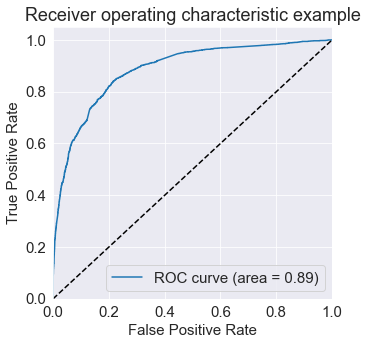

In [116]:
auc_score = roc_auc_score(y_train_pred_final.Converted,y_train_pred_final.Converted_Probabillity)
plt.figure(figsize=(5, 5))
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic curve')
plt.legend(loc="lower right")
plt.show()

### Finding optimal cutoff pt for 'predicted' column, since 0.5 was chosen arbitrarily.

In [117]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i]= y_train_pred_final.Converted_Probabillity.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Probabillity  LeadId  predicted  0.0  0.1  0.2  \
4715          0                0.156707    4715          0    1    1    0   
7132          1                0.593791    7132          1    1    1    1   
8954          0                0.858255    8954          1    1    1    1   
5283          0                0.204956    5283          0    1    1    1   
3003          0                0.249268    3003          0    1    1    1   

      0.3  0.4  0.5  0.6  0.7  0.8  0.9  
4715    0    0    0    0    0    0    0  
7132    1    1    1    0    0    0    0  
8954    1    1    1    1    1    1    0  
5283    0    0    0    0    0    0    0  
3003    0    0    0    0    0    0    0

In [118]:
probabillity_cutoff = pd.DataFrame( columns = ['probabillity','accuracy','sensitivity','specificity'])

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    cm = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    probabillity_cutoff.loc[i] =[i,accuracy,sensitivity,specificity]
probabillity_cutoff

probabillity  accuracy  sensitivity  specificity
0.0           0.0  0.384045     1.000000     0.000000
0.1           0.1  0.635591     0.965781     0.429719
0.2           0.2  0.762987     0.902576     0.675954
0.3           0.3  0.801020     0.851852     0.769327
0.4           0.4  0.809678     0.781401     0.827309
0.5           0.5  0.808287     0.671900     0.893323
0.6           0.6  0.806586     0.604267     0.932731
0.7           0.7  0.791280     0.542673     0.946285
0.8           0.8  0.768089     0.448068     0.967620
0.9           0.9  0.712894     0.268519     0.989960

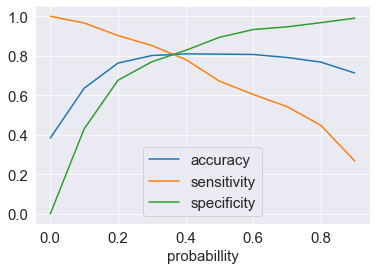

In [119]:
#finding optimal cutoff
probabillity_cutoff.plot.line(x='probabillity', y=['accuracy','sensitivity','specificity'])
plt.show()

we can see that the intersection point is somewhere between 0.35 and 0.4- assuming it to be the midpoint i.e. 0.375.

Now we'll modify the predicted variable accordingly.

In [120]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Probabillity.map( lambda x: 1 if x > 0.375 else 0)
y_train_pred_final.head()

Converted  Converted_Probabillity  LeadId  predicted  0.0  0.1  0.2  \
4715          0                0.156707    4715          0    1    1    0   
7132          1                0.593791    7132          1    1    1    1   
8954          0                0.858255    8954          1    1    1    1   
5283          0                0.204956    5283          0    1    1    1   
3003          0                0.249268    3003          0    1    1    1   

      0.3  0.4  0.5  0.6  0.7  0.8  0.9  
4715    0    0    0    0    0    0    0  
7132    1    1    1    0    0    0    0  
8954    1    1    1    1    1    1    0  
5283    0    0    0    0    0    0    0  
3003    0    0    0    0    0    0    0

In [121]:
y_train_pred_final['Score'] = y_train_pred_final.Converted_Probabillity.map(lambda x: round(x*100))
y_train_pred_final

Converted  Converted_Probabillity  LeadId  predicted  0.0  0.1  0.2  \
4715          0                0.156707    4715          0    1    1    0   
7132          1                0.593791    7132          1    1    1    1   
8954          0                0.858255    8954          1    1    1    1   
5283          0                0.204956    5283          0    1    1    1   
3003          0                0.249268    3003          0    1    1    1   
...         ...                     ...     ...        ...  ...  ...  ...   
5734          0                0.081687    5734          0    1    0    0   
5191          0                0.082408    5191          0    1    0    0   
5390          1                0.981123    5390          1    1    1    1   
860           0                0.126343     860          0    1    1    0   
7270          1                0.625396    7270          1    1    1    1   

      0.3  0.4  0.5  0.6  0.7  0.8  0.9  Score  
4715    0    0    0    0    0    0    0     16  
7132    1    1    1    0    0    0    0     59  
8954    1    1    1    1    1    1    0     86  
5283    0    0    0    0    0    0    0     20  
3003    0    0    0    0    0    0    0     25  
...   ...  ...  ...  ...  ...  ...  ...    ...  
5734    0    0    0    0    0    0    0      8  
5191    0    0    0    0    0    0    0      8  
5390    1    1    1    1    1    1    1     98  
860     0    0    0    0    0    0    0     13  
7270    1    1    1    1    0    0    0     63  

[6468 rows x 15 columns]

### Creating final lead scoring dataframe

In [122]:
#taking only the columns with alphabetical column names
final_lead_scoring = y_train_pred_final[["LeadId","Converted","predicted","Score"]]
final_lead_scoring.head()

LeadId  Converted  predicted  Score
4715    4715          0          0     16
7132    7132          1          1     59
8954    8954          0          1     86
5283    5283          0          0     20
3003    3003          0          0     25

In [123]:
#showing the predictions made for leads who converted.
final_lead_scoring[final_lead_scoring["Converted"]==1]['predicted']

7132    1
1352    1
3166    0
7420    1
4782    1
       ..
4426    1
466     0
6265    1
5390    1
7270    1
Name: predicted, Length: 2484, dtype: int64

In [124]:
#printing conversion rate
print("Conversion Rate: ", str(round(len(final_lead_scoring[final_lead_scoring["Converted"]==1][final_lead_scoring['predicted']==1])/len(final_lead_scoring[final_lead_scoring["Converted"]==1]['predicted']),1)*100)+"%")

Conversion Rate:  80.0%


<ipython-input-124-2c4868d55ba2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print("Conversion Rate: ", str(round(len(final_lead_scoring[final_lead_scoring["Converted"]==1][final_lead_scoring['predicted']==1])/len(final_lead_scoring[final_lead_scoring["Converted"]==1]['predicted']),1)*100)+"%")


Conversion rate is 80% which is a huge improvement from the initial 30%.

In [125]:
#saving as dataframe
final_lead_scoring.to_csv("lead scores.csv")